In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as p
import matplotlib.image as im
from matplotlib import patches

In [79]:
df=pd.read_csv('scores.csv', comment='#', escapechar='\t')
#for i in df:
#    if i[0]=='\t':
#        i==i[1:]
#        df.rename(columns={i: i[1:]}, inplace=True)
df.rename(columns=lambda x: x.strip('\t ') if isinstance(x, str) else x, inplace=True)
df['city'] = df['city'].str.lstrip()
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.strip('\t')if isinstance(x, str) else x)
    df[col] = df[col].apply(lambda x: x.lstrip() if isinstance(x, str) else x)
df

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
1,1,1,7,2023,Persis Solo,2,1,0,0,Persebaya Surabaya,3,1,3,3,Manahan,Solo
2,1,2,7,2023,Persib Bandung,1,1,1,1,Madura United FC,1,1,1,1,Gelora Bandung Lautan Api,Bandung
3,1,2,7,2023,Dewa United FC,1,1,3,3,Arema FC,0,1,0,0,Indomilk Arena,Tangerang
4,1,2,7,2023,PS Barito Putera,2,1,3,3,Persita Tangerang,0,1,0,0,Demang Lehman,Martapura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,16,21,10,2023,PSS Sleman,2,8,1,19,Persik Kediri,2,9,1,20,Maguwoharjo,Sleman
140,16,21,10,2023,Borneo FC Samarinda,1,8,1,32,Persib Bandung,1,9,1,28,Segiri,Samarinda
141,16,22,10,2023,Persita Tangerang,2,9,3,18,Persis Solo,1,9,0,20,Indomilk Arena,Tangerang
142,16,22,10,2023,Madura United FC,1,8,0,30,Dewa United FC,4,8,3,24,Gelora Madura Ratu Pamelingan,Pamekasan


In [3]:
ket = open('scores.csv', 'r').readlines()
ket[-1]

'#home total = total points (cumulative) earned in total for team in home column'

In [105]:
print(df['city'].values)

['Gianyar' 'Solo' 'Bandung' 'Tangerang' 'Martapura' 'Sleman' 'Kediri'
 'Semarang' 'Jakarta Pusat' 'Sleman' 'Gianyar' 'Surabaya' 'Pare-pare'
 'Tangerang' 'Samarinda' 'Pamekasan' 'Bekasi' 'Bogor' 'Bogor' 'Martapura'
 'Bandung' 'Sleman' 'Kediri' 'Solo' 'Gianyar' 'Semarang' 'Bekasi'
 'Samarinda' 'Sleman' 'Tangerang' 'Gianyar' 'Tangerang' 'Pare-pare'
 'Bekasi' 'Surabaya' 'Pamekasan']


### algorithm cekson

In [63]:
df.loc[df.home.str.contains('Kediri')]

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
6,1,3,7,2023,Persik Kediri,1,1,1,1,Borneo FC Samarinda,1,1,1,1,Brawijaya,Kediri
22,3,15,7,2023,Persik Kediri,5,2,3,4,Arema FC,2,2,0,1,Brawijaya,Kediri


In [65]:
# home or away at certain week
df.loc[ ( (df.home.str.contains('Bali')) | (df.away.str.contains('Bali')) ) & (df['week']==3) ]
#df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==pekanke) ]

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
24,3,15,7,2023,Bali United FC,2,2,3,3,Madura United FC,1,2,0,4,Kapten I Wayan Dipta,Gianyar


In [9]:
df.loc[df.home.str.contains('Madura') | df.away.str.contains('Madura')]

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
2,1,2,7,2023,Persib Bandung,1,1,1,1,Madura United FC,1,1,1,1,Gelora Bandung Lautan Api,Bandung
15,2,9,7,2023,Madura United FC,3,1,3,4,Persik Kediri,2,1,0,1,Gelora Madura Ratu Pamelingan,Pamekasan
24,3,15,7,2023,Bali United FC,2,2,3,3,Madura United FC,1,2,0,4,Kapten I Wayan Dipta,Gianyar
35,4,23,7,2023,Madura United FC,4,2,3,7,Persis Solo,3,2,0,4,Gelora Madura Ratu Pamelingan,Pamekasan
44,5,30,7,2023,PS Barito Putera,1,3,0,7,Madura United FC,2,3,3,10,Demang Lehman,Martapura
53,6,5,8,2023,Madura United FC,1,3,3,13,PSIS Semarang,0,3,0,8,Gelora Bangkalan,Bangkalan
61,7,9,8,2023,Rans Nusantara FC,3,4,3,12,Madura United FC,1,4,0,13,Maguwoharjo,Sleman
68,8,13,8,2023,Madura United FC,2,4,3,16,Persija Jakarta,0,4,0,12,Gelora Bangkalan,Bangkalan
75,9,19,8,2023,Persikabo 1973,0,5,0,8,Madura United FC,3,5,3,19,Wibawa Mukti,Bekasi
82,10,25,8,2023,Madura United FC,0,5,1,20,Bhayangkara FC,0,5,1,5,Gelora Bangkalan,Bangkalan


In [67]:
hgf=df.loc[df.home.str.contains('Bali')]['hscore'].sum() #goal for
agf=df.loc[df.away.str.contains('Bali')]['ascore'].sum()
hga=df.loc[df.home.str.contains('Bali')]['ascore'].sum() #goal against
aga=df.loc[df.away.str.contains('Bali')]['hscore'].sum()
win=df[((df['home'] == 'Bali United FC') & (df['hpoint'] == 3)) | ((df['away'] == 'Bali United FC') & (df['apoint'] == 3))].shape[0]
draw=df[((df['home'] == 'Bali United FC') & (df['hpoint'] == 1)) | ((df['away'] == 'Bali United FC') & (df['apoint'] == 1))].shape[0]
lose=df[((df['home'] == 'Bali United FC') & (df['hpoint'] == 0)) | ((df['away'] == 'Bali United FC') & (df['apoint'] == 0))].shape[0]
print(hgf,agf,hga,aga,win,draw,lose)

2 1 2 3 1 0 2


In [228]:
if hora.home.str.contains('Bali').item():
    total_point=hora.htotal
else:
    total_point=hora.atotal
total_point

14    0
Name: atotal, dtype: int64

# klasemen pekan ke

In [80]:
club = df['home'].unique()
club

array(['Bali United FC', 'Persis Solo', 'Persib Bandung',
       'Dewa United FC', 'PS Barito Putera', 'Rans Nusantara FC',
       'Persik Kediri', 'PSIS Semarang', 'Persija Jakarta', 'PSS Sleman',
       'Arema FC', 'Persebaya Surabaya', 'PSM Makassar',
       'Persita Tangerang', 'Borneo FC Samarinda', 'Madura United FC',
       'Bhayangkara FC', 'Persikabo 1973'], dtype=object)

In [81]:
points = []
hgf=[]
agf=[]
hga=[]
aga=[]
win=[]
draw=[]
lose=[]
played=[]
pekanke=16 # PEKAN KE
for cl in club:
    hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==pekanke) ] # PEKAN KE
    
    hgf.append(df.loc[df.home.str.contains(cl)]['hscore'].sum()) #goal for
    agf.append(df.loc[df.away.str.contains(cl)]['ascore'].sum())
    hga.append(df.loc[df.home.str.contains(cl)]['ascore'].sum()) #goal against
    aga.append(df.loc[df.away.str.contains(cl)]['hscore'].sum())
    
    win.append(df[((df['home'] == cl) & (df['hpoint'] == 3)) | ((df['away'] == cl) & (df['apoint'] == 3))].shape[0])
    draw.append(df[((df['home'] == cl) & (df['hpoint'] == 1)) | ((df['away'] == cl) & (df['apoint'] == 1))].shape[0])
    lose.append(df[((df['home'] == cl) & (df['hpoint'] == 0)) | ((df['away'] == cl) & (df['apoint'] == 0))].shape[0])

    try:
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])          
        else:
            points.append(hora['atotal'].values[0])
        played.append(pekanke)
        #print ('try ',cl,' ',pekanke)
    except:
        week = len(df.loc[(df['home']==cl)|(df['away']==cl)]['week'])
        lweek = max(df.loc[(df['home']==cl)|(df['away']==cl)]['week'])
        hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==lweek) ]
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])          
        else:
            points.append(hora['atotal'].values[0])
        played.append(week)
        #print ('ex ',cl,' ',pekanke-1)
points

[27, 20, 28, 24, 23, 29, 20, 27, 20, 19, 13, 22, 21, 18, 32, 30, 7, 10]

## head to head

In [5]:
df.groupby(["home","away"])

In [82]:
dff=df.groupby(["home","away"]).agg({'hscore':['max'],'ascore':['max'],
                                     'hpoint':['max'],'apoint':['max']})
dff.columns=dff.columns.droplevel(1)
#dff = dff.unstack(fill_value=0)
#dff = pd.merge(dff, df[['home', 'away', 'hscore', 'ascore']], on=['home', 'away'])
dff

hscore  ascore  hpoint  apoint
home              away                                               
Arema FC          Bali United FC            1       3       0       3
                  Borneo FC Samarinda       0       1       0       3
                  PS Barito Putera          0       4       0       3
                  PSS Sleman                2       1       3       0
                  Persib Bandung            3       3       1       1
...                                       ...     ...     ...     ...
Rans Nusantara FC PSS Sleman                0       0       1       1
                  Persik Kediri             1       0       3       0
                  Persikabo 1973            2       1       3       0
                  Persis Solo               1       2       0       3
                  Persita Tangerang         0       1       0       3

[144 rows x 4 columns]

### cekson refer elemen multi-level datafrem

In [27]:
dff.loc[['Madura United FC']]

hscore  ascore  hpoint  apoint
home             away                                           
Madura United FC Bhayangkara FC        0       0       1       1
                 PSIS Semarang         1       0       3       0
                 Persija Jakarta       2       0       3       0
                 Persik Kediri         3       2       3       0
                 Persis Solo           4       3       3       0

In [17]:
dff.loc[[('Persis Solo','Persib Bandung'),('Rans Nusantara FC','PSS Sleman')]]

,,hscore,ascore,hpoint,apoint
home,away,,,,
Persis Solo,Persib Bandung,2,1,3,0
Rans Nusantara FC,PSS Sleman,0,0,1,1


In [34]:
dff.loc[(dff.index.get_level_values('home')=='PS Barito Putera') | #(dff.index.get_level_values("away") == 'PS Barito Putera')]
        (dff.index.get_level_values('home')=='Borneo FC Samarinda')|
        (dff.index.get_level_values('home')=='PSIS Semarang')|
        (dff.index.get_level_values('home')=='PSM Makassar')|
        (dff.index.get_level_values('home')=='Madura United FC')|
        (dff.index.get_level_values('home')=='Rans Nusantara FC')]

hscore  ascore  hpoint  apoint
home                away                                               
Borneo FC Samarinda Bali United FC            3       1       3       0
                    PS Barito Putera          2       1       3       0
                    Persikabo 1973            3       2       3       0
                    Rans Nusantara FC         1       1       1       1
Madura United FC    PSIS Semarang             1       0       3       0
                    Persija Jakarta           2       0       3       0
                    Persik Kediri             3       2       3       0
                    Persis Solo               4       3       3       0
PS Barito Putera    Dewa United FC            2       1       3       0
                    Madura United FC          1       2       0       3
                    PSS Sleman                3       1       3       0
                    Persik Kediri             2       0       3       0
                    Persita Tangerang         2       0       3       0
PSIS Semarang       Arema FC                  2       0       3       0
                    Bhayangkara FC            3       1       3       0
                    Borneo FC Samarinda       0       0       1       1
                    Persebaya Surabaya        2       0       3       0
                    Persib Bandung            1       2       0       3
PSM Makassar        Dewa United FC            1       2       0       3
                    Persib Bandung            4       2       3       0
                    Persik Kediri             1       2       0       3
Rans Nusantara FC   Dewa United FC            0       0       1       1
                    Madura United FC          3       1       3       0
                    PSS Sleman                0       0       1       1
                    Persikabo 1973            2       1       3       0
                    Persita Tangerang         0       1       0       3

In [29]:
dff.loc[dff.index.get_level_values('away')=='Madura United FC'] #iloc juga bisa

,,hscore,ascore,hpoint,apoint
home,away,,,,
Bali United FC,Madura United FC,2,1,3,0
PS Barito Putera,Madura United FC,1,2,0,3
Persib Bandung,Madura United FC,1,1,1,1
Persikabo 1973,Madura United FC,0,3,0,3
Persita Tangerang,Madura United FC,1,3,0,3
Rans Nusantara FC,Madura United FC,3,1,3,0


In [42]:
#dff.loc[['Persis Solo']]
#dff.loc[dff.index.get_level_values('away')=='Persis Solo'] #iloc juga bisa
dff.loc[[('PSS Sleman','Persis Solo'),('Persis Solo','Borneo FC Samarinda')]]
dff.loc[ ((h1&a2) | (h2&a1))

,,hscore,ascore,hpoint,apoint
home,away,,,,
PSS Sleman,Persis Solo,2,2,1,1
Persis Solo,Borneo FC Samarinda,2,1,3,0


In [43]:
len(dff.loc[[('PSS Sleman','Persis Solo'),('Persis Solo','Borneo FC Samarinda')]])

2

In [183]:
print(
    dff.loc[('Persis Solo','Borneo FC Samarinda')]['hpoint'],
    dff.loc[('PSS Sleman','Persis Solo')]['hpoint']
)

3 1


### who's upper?

In [185]:
#GIMANA INI?

max(
    (dff.loc[('Persis Solo','Borneo FC Samarinda')]['hpoint']),
    (dff.loc[('PSS Sleman','Persis Solo')]['hpoint'])
)

3

## klasemen

In [83]:
tables = pd.DataFrame ({"Clubs": club, "Played":played, "Won":win, "Drawn":draw, "Lost":lose, 
                        "GF":[h + a for h, a in zip(hgf, agf)], "GA":[h + a for h, a in zip(hga, aga)], 
                        "Points": points})
#tables["GD"]=tables['GF']-tables['GA']
tables.insert(len(tables.columns)-1, "GD", (tables['GF']-tables['GA']))

# Convert club names to lowercase before sorting bikinan chatgpt tapi solutip
tables["Clubs_lower"] = tables["Clubs"].str.lower()

# Sort the dataframe + indexing
tables=tables.sort_values(by=['Points','GD','GF','Clubs_lower'], ascending=[False,False,False,True]).reset_index(drop=True)
tables.index=tables.index + 1

# Drop the temporary "Clubs_lower" column
tables.drop(columns=["Clubs_lower"], inplace=True)

tables

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points
1,Borneo FC Samarinda,16,9,5,2,23,14,9,32
2,Madura United FC,16,9,3,4,29,20,9,30
3,Rans Nusantara FC,16,8,5,3,21,15,6,29
4,Persib Bandung,16,7,7,2,30,21,9,28
5,PSIS Semarang,16,8,3,5,24,18,6,27
6,Bali United FC,16,8,3,5,26,21,5,27
7,Dewa United FC,16,6,6,4,24,19,5,24
8,PS Barito Putera,16,6,5,5,23,16,7,23
9,Persebaya Surabaya,16,6,4,6,20,23,-3,22
10,PSM Makassar,16,6,3,7,19,17,2,21


### coba sort h2h bikinan gua

check standings resulted from priority fixing before sort_values command!

In [84]:
# another dataframe
pridx=n.array((range(18,0,-1)))
sh = tables[['Clubs','Points']]
sh.insert(2,'pr',pridx)
sh

,Clubs,Points,pr
1,Borneo FC Samarinda,32,18
2,Madura United FC,30,17
3,Rans Nusantara FC,29,16
4,Persib Bandung,28,15
5,PSIS Semarang,27,14
6,Bali United FC,27,13
7,Dewa United FC,24,12
8,PS Barito Putera,23,11
9,Persebaya Surabaya,22,10
10,PSM Makassar,21,9


In [85]:
pridx=n.array((range(18,0,-1)))
sh = tables[['Clubs','Points']]
sh.insert(2,'pr',pridx)
sh

for i in range (1,len(sh)+1,1):#(len(sh)):
    #print (i)
    try:
        #sh['Points'][i]==sh['Points'][i+1]
        #print(sh['Clubs'][i], sh['Clubs'][i+1])
        
        if sh['Points'][i]==sh['Points'][i+1]:
            
            h1=dff.index.get_level_values('home')==sh['Clubs'][i]
            a2=dff.index.get_level_values('away')==sh['Clubs'][i+1]
            h2=dff.index.get_level_values('home')==sh['Clubs'][i+1]
            a1=dff.index.get_level_values('away')==sh['Clubs'][i]
            
            i1scr=0
            i2scr=0
        
            game = dff.loc[ ((h1&a2) | (h2&a1)) ]
            #print('game masuk try lv 1')
            
            if len(game)==1:
                #print('game 1')
                
                try:
                    i1scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['hpoint']
                    i2scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['apoint']
                    #print('try lv 2')
                except:
                    i1scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['apoint'] 
                    i2scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['hpoint']
                    #print('exc lv 2')
                
                #if i1scr < i2scr: EMANG KOMEN
                    #sh['pr'][i]=sh['pr'][i]-1 EMANG KOMEN
                    #sh['pr'][i+1]=sh['pr'][i+1]+1 EMANG KOMEN
            
            elif len(game)==2:
                i1scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['hpoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['apoint']
                i2scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['apoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['hpoint']
                #print('game = 2')
                
            if i1scr < i2scr:
                #print('i1scr < i2scr')
                #sh.at[i,'pr']=sh['pr'][i]-1
                #sh.at[i+1,'pr']=sh['pr'][i+1]+1
                temp1, temp2 = sh.loc[i].copy(), sh.loc[i+1].copy()
                sh.loc[i],sh.loc[i+1] = temp2, temp1
        
    except:
        #print('gabisa')
        pass
sh

,Clubs,Points,pr
1,Borneo FC Samarinda,32,18
2,Madura United FC,30,17
3,Rans Nusantara FC,29,16
4,Persib Bandung,28,15
5,PSIS Semarang,27,14
6,Bali United FC,27,13
7,Dewa United FC,24,12
8,PS Barito Putera,23,11
9,Persebaya Surabaya,22,10
10,PSM Makassar,21,9


In [58]:
#sh=sh.sort_values(by='pr', ascending=False).reset_index(drop=True)
#sh

,Clubs,Points,pr
0,Borneo FC Samarinda,32,18
1,Madura United FC,30,17
2,Rans Nusantara FC,29,16
3,Persib Bandung,28,15
4,PSIS Semarang,27,14
5,Bali United FC,27,13
6,Dewa United FC,24,12
7,PS Barito Putera,23,11
8,Persebaya Surabaya,22,10
9,PSM Makassar,21,9


### bikinan chat gpt gblk

In [9]:
tablesai=pd.DataFrame ({"Clubs": club, "Won":win, "Drawn":draw, "Lost":lose, 
                        "GF":[h + a for h, a in zip(hgf, agf)], "GA":[h + a for h, a in zip(hga, aga)], 
                        "Points": points})
tablesai.insert(len(tablesai.columns)-1, "GD", (tablesai['GF']-tablesai['GA']))

tablesai=tablesai.sort_values(by=['Points'], ascending=False).reset_index(drop=True)
tablesai.index=tablesai.index + 1
tablesai

,Clubs,Won,Drawn,Lost,GF,GA,GD,Points
1,Madura United FC,7,2,2,21,13,8,23
2,PS Barito Putera,6,2,3,20,10,10,20
3,Borneo FC Samarinda,5,4,2,17,12,5,19
4,Rans Nusantara FC,5,4,2,13,9,4,19
5,PSIS Semarang,5,3,3,17,11,6,18
6,Persebaya Surabaya,5,3,3,13,12,1,18
7,Bali United FC,5,2,4,17,16,1,17
8,PSS Sleman,4,5,2,17,16,1,17
9,Dewa United FC,4,4,3,14,13,1,16
10,PSM Makassar,4,3,4,13,12,1,15


In [19]:
def custom_sort(tablesai, dff, swap_rows):
    # Sort by "Points" in descending order
    tablesai.sort_values(by='Points', ascending=False, inplace=True)
    
    # Resolve ties using "Head to Head"
    for i in range(len(tablesai)):
        team = tablesai.iloc[i]['Clubs']
        matches = dff.loc[team]
        for _, match in matches.iterrows():
            if match['home'] == team:
                opp_team = match['away']
                opp_index = tablesai.index[tablesai['Clubs'] == opp_team].values[0]
                if tablesai.at[i, 'Points'] == tablesai.at[opp_index, 'Points']:
                    if match['hscore'] > match['ascore']:
                        tablesai = swap_rows(tablesai, i, opp_index)
    
    # Resolve ties using "Goals Difference" in descending order
    tablesai.sort_values(by='GD', ascending=False, inplace=True)
    
    # Resolve ties using "Goals Aggressiveness" in descending order
    tablesai.sort_values(by='GF', ascending=False, inplace=True)

    tablesai.reset_index(drop=True, inplace=True)
    return tablesai

def swap_rows(df, row1, row2):
    temp = df.iloc[row1].copy()
    df.iloc[row1] = df.iloc[row2]
    df.iloc[row2] = temp
    return df

custom_sort(tablesai, dff, swap_rows)

KeyError: 'home'

### algorithm cekson

In [16]:
eq=df.loc[
    ( (df['home']==tables['Clubs'][1]) & (df['away']==tables['Clubs'][1+1]) )|
    ( (df['away']==tables['Clubs'][1]) & (df['home']==tables['Clubs'][1+1]) ),
    ['home','away','hpoint']
].reset_index(drop=True)

#if len(eq)==0:
#    eq.loc[0]=n.nan
if len(eq)<=1:
    eq.loc[1]=n.nan
    if len(eq)<=1:
        eq.loc[0]=n.nan
    #eq=eq.sort_index()
    
if n.isnan(eq.home[0]):
    #print ('y')
    ret=tables['Clubs'][1]
else:
    ret=eq.sort_values(by='hpoint')['home'].reset_index(drop=True)[0]
    
#max(eq['hpoint'][0],eq['hpoint'][1])

#eq.sort_values(by='hpoint')['home'][0]
#len(eq)
print(eq)
print(ret)
print(f'eq[home][0] = {eq.home[0]}')
tables['Clubs'][1]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [50]:
eq=df.loc[
    ( (df['home']==tables['Clubs'][3]) & (df['away']==tables['Clubs'][3+1]) )|
    ( (df['away']==tables['Clubs'][3]) & (df['home']==tables['Clubs'][3+1]) ),
    ['home','away','hpoint','apoint']
].reset_index(drop=True)

if len(eq)<=1:
    eq.loc[1]=n.nan
    if len(eq)<=1:
        eq.loc[0]=n.nan
eq=eq.sort_index()
eq

,home,away,hpoint,apoint
0,Borneo FC Samarinda,PS Barito Putera,3.0,0.0
1,NaN,NaN,NaN,NaN


# hitung home away poin dari mana

run this after merged sh-tables dataframe

### algorithm cekson

#### hitung poin home/away klub peringkat 1 yang diperoleh dari peringkat 1-6

In [18]:
df.loc[(df['home']==merg['Clubs'][1]) & (df['away'].isin(merg['Clubs'].iloc[1:5])), ['home', 'away', 'hpoint']]

,home,away,hpoint
53,Madura United FC,PSIS Semarang,3


In [66]:
#home vs 1-5
mask11=((df['home']==merg['Clubs'][1])&(df['away']==merg['Clubs'][1])) | ((df['home']==merg['Clubs'][1])&(df['away']==merg['Clubs'][1]))
mask12=((df['home']==merg['Clubs'][1])&(df['away']==merg['Clubs'][2])) | ((df['home']==merg['Clubs'][2])&(df['away']==merg['Clubs'][1]))
mask13=((df['home']==merg['Clubs'][1])&(df['away']==merg['Clubs'][3])) | ((df['home']==merg['Clubs'][3])&(df['away']==merg['Clubs'][1]))
mask14=((df['home']==merg['Clubs'][1])&(df['away']==merg['Clubs'][4])) | ((df['home']==merg['Clubs'][4])&(df['away']==merg['Clubs'][1]))
mask15=((df['home']==merg['Clubs'][1])&(df['away']==merg['Clubs'][5])) | ((df['home']==merg['Clubs'][5])&(df['away']==merg['Clubs'][1]))
mask16=((df['home']==merg['Clubs'][1])&(df['away']==merg['Clubs'][6])) | ((df['home']==merg['Clubs'][6])&(df['away']==merg['Clubs'][1]))
mask=df.loc[mask11|mask12|mask13|mask14|mask15].reset_index(drop=True) #
mask

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,5,30,7,2023,PS Barito Putera,1,3,0,7,Madura United FC,2,3,3,10,Demang Lehman,Martapura
1,6,5,8,2023,Madura United FC,1,3,3,13,PSIS Semarang,0,3,0,8,Gelora Bangkalan,Bangkalan
2,7,9,8,2023,Rans Nusantara FC,3,4,3,12,Madura United FC,1,4,0,13,Maguwoharjo,Sleman


In [86]:
df.loc[df['away'].isin(merg['Clubs'].iloc[1:3])] # 1 excluded: 2,3
df.loc[df['away'].isin(merg['Clubs'].loc[1:3])].head() # 1 included: 1,2,3

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
2,1,2,7,2023,Persib Bandung,1,1,1,1,Madura United FC,1,1,1,1,Gelora Bandung Lautan Api,Bandung
6,1,3,7,2023,Persik Kediri,1,1,1,1,Borneo FC Samarinda,1,1,1,1,Brawijaya,Kediri
11,2,8,7,2023,Persebaya Surabaya,1,1,1,4,PS Barito Putera,1,1,1,4,Gelora Bung Tomo,Surabaya
23,3,15,7,2023,Persis Solo,2,2,3,4,Borneo FC Samarinda,1,2,0,4,Manahan,Solo
24,3,15,7,2023,Bali United FC,2,2,3,3,Madura United FC,1,2,0,4,Kapten I Wayan Dipta,Gianyar


In [91]:
hmask=(df['home']==merg['Clubs'][1]) & (df['away'].isin(merg['Clubs'].loc[1:6]))
amask=(df['away']==merg['Clubs'][1]) & (df['home'].isin(merg['Clubs'].loc[1:6]))
mask=df.loc[hmask|amask]
mask

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
44,5,30,7,2023,PS Barito Putera,1,3,0,7,Madura United FC,2,3,3,10,Demang Lehman,Martapura
53,6,5,8,2023,Madura United FC,1,3,3,13,PSIS Semarang,0,3,0,8,Gelora Bangkalan,Bangkalan
61,7,9,8,2023,Rans Nusantara FC,3,4,3,12,Madura United FC,1,4,0,13,Maguwoharjo,Sleman


In [93]:
mask.loc[(mask['away']==merg['Clubs'][1])].shape[0]*3
(mask.loc[(mask['away']==merg['Clubs'][1])]['apoint'].sum())/(mask.loc[(mask['away']==merg['Clubs'][1])].shape[0]*3)

0.5

In [112]:
std_mask=hbdf.loc[hbdf['club']==merg['Clubs'][1]]
std_mask
#std_mask['homelib'].values[0]

,club,homebase,city,homelib,citylib,played,falsehome,dom
5,Madura United FC,Gelora Bangkalan,Bangkalan,Gelora Madura Ratu Pamelingan,Pamekasan,yes,NaN,NaN


In [129]:
#df.loc[(df['home']==merg['Clubs'][1]) & ((df['stadium']==std_mask['homebase'].values[0])|(df['stadium']==std_mask['homelib'].values[0]))]
#df.loc[(df['home']==merg['Clubs'][1])]
mask.loc[(mask['home']==merg['Clubs'][1]) & ((mask['stadium']==std_mask['homebase'].values[0])|(mask['stadium']==std_mask['homelib'].values[0]))]
#mask.loc[(mask['home']==merg['Clubs'][1]) & ((mask['stadium']!=std_mask['homebase'].values[0])&(mask['stadium']!=std_mask['homelib'].values[0]))]

3

## where did this club earn their points?

### tesdraip

In [20]:
hpefr=[]
fhpefr=[]
apefr=[]
hpewdt=[]
fhpewdt=[]
apewdt=[]
iy=merg['Clubs'][6]
for i in (1, 7, 13):
    hmask=(df['home']==iy) & (df['away'].isin(merg['Clubs'].loc[i:(i+5)]))
    amask=(df['away']==iy) & (df['home'].isin(merg['Clubs'].loc[i:(i+5)]))
    mask=df.loc[hmask|amask]
    
    std_mask=hbdf.loc[hbdf['club']==iy]
    
    hpefr.append(mask.loc[(mask['home']==iy) & ((mask['stadium']==std_mask['homebase'].values[0])|(mask['stadium']==std_mask['homelib'].values[0]))]['hpoint'].sum())
    fhpefr.append(mask.loc[(mask['home']==iy) & ((mask['stadium']!=std_mask['homebase'].values[0])&(mask['stadium']!=std_mask['homelib'].values[0]))]['hpoint'].sum())
    apefr.append(mask.loc[(mask['away']==iy)]['apoint'].sum())
    
    hpewdt.append(mask.loc[(mask['home']==iy) & ((mask['stadium']==std_mask['homebase'].values[0])|(mask['stadium']==std_mask['homelib'].values[0]))].shape[0]*3)
    fhpewdt.append(mask.loc[(mask['home']==iy) & ((mask['stadium']!=std_mask['homebase'].values[0])&(mask['stadium']!=std_mask['homelib'].values[0]))].shape[0]*3)
    apewdt.append(mask.loc[(mask['away']==iy)].shape[0]*3)

yasip = pd.DataFrame({
    'Club':iy,
    'Home Point 1-6':hpefr[0],
    'Home Point 7-12':hpefr[1],
    'Home Point 13-18':hpefr[2],
    'Home Width 1-6':hpewdt[0],
    'Home Width 7-12':hpewdt[1],
    'Home Width 13-18':hpewdt[2],
    'False Home Point 1-6':fhpefr[0],
    'False Home Point 7-12':fhpefr[1],
    'False Home Point 13-18':fhpefr[2],
    'False Home Width 1-6':fhpewdt[0],
    'False Home Width 7-12':fhpewdt[1],
    'False Home Width 13-18':fhpewdt[2],
    'Away Point 1-6':apefr[0],
    'Away Point 7-12':apefr[1],
    'Away Point 13-18':apefr[2],
    'Away Width 1-6':apewdt[0],
    'Away Width 7-12':apewdt[1],
    'Away Width 13-18':apewdt[2],
}, index=[0])
yasip

,Club,Home Point 1-6,Home Point 7-12,Home Point 13-18,Home Width 1-6,Home Width 7-12,Home Width 13-18,False Home Point 1-6,False Home Point 7-12,False Home Point 13-18,False Home Width 1-6,False Home Width 7-12,False Home Width 13-18,Away Point 1-6,Away Point 7-12,Away Point 13-18,Away Width 1-6,Away Width 7-12,Away Width 13-18
0,Persebaya Surabaya,5,3,3,9,3,6,0,0,0,0,0,0,0,1,6,3,6,6


In [156]:
sum(hpefr+fhpefr+apefr)

18

### dictionary

In [97]:
def earnfrom (syrt):
    point=syrt.sum()
    width=syrt.count()*3
    return(point,width)

In [98]:
dct={'club':merg['Clubs'].values.tolist(), 
     'home':[{'point':[], 'width':[]} for _ in range(len(merg['Clubs']))], 
     'fhome':[{'point':[], 'width':[]} for _ in range(len(merg['Clubs']))], 
     'away':[{'point':[], 'width':[]} for _ in range(len(merg['Clubs']))]}

for ii, cl in zip (range(len(merg['Clubs'])), dct['club']):
    
    for i in (1, 2, 3):
        hmask=(df['home']==cl) & (df['away'].isin(merg['Clubs'].loc[(5*(i-1)+i):(6*i)]))
        amask=(df['away']==cl) & (df['home'].isin(merg['Clubs'].loc[(5*(i-1)+i):(6*i)]))
        mask=df.loc[hmask|amask]
    
        std_mask=hbdf.loc[hbdf['club']==cl]
        
        if 'Persis' in cl:
            hpefr, hpewdt  = earnfrom(mask.loc[(mask['home']==cl) & ((mask['stadium']==std_mask['homebase'].values[0])|(mask['city']=='Solo'))]['hpoint'])
            fhpefr,fhpewdt = earnfrom(mask.loc[(mask['home']==cl) & ((mask['stadium']!=std_mask['homebase'].values[0])&(mask['city']!='Solo'))]['hpoint'])
        else:
            hpefr, hpewdt = earnfrom(mask.loc[(mask['home']==cl) & ((mask['stadium']==std_mask['homebase'].values[0])|(mask['stadium']==std_mask['homelib'].values[0]))]['hpoint'])
            fhpefr,fhpewdt= earnfrom(mask.loc[(mask['home']==cl) & ((mask['stadium']!=std_mask['homebase'].values[0])&(mask['stadium']!=std_mask['homelib'].values[0]))]['hpoint'])
        apefr, apewdt = earnfrom(mask.loc[(mask['away']==cl)]['apoint'])
    
        for j, jj, jjj in zip (list(dct.keys())[1:], [hpefr,fhpefr,apefr], [hpewdt,fhpewdt,apewdt]):
            dct[j][ii]['point'].insert(i,jj)
            dct[j][ii]['width'].insert(i,jjj)

dct

{'club': ['Borneo FC Samarinda',
  'Madura United FC',
  'Rans Nusantara FC',
  'Persib Bandung',
  'PSIS Semarang',
  'Bali United FC',
  'Dewa United FC',
  'PS Barito Putera',
  'Persebaya Surabaya',
  'PSM Makassar',
  'Persija Jakarta',
  'Persik Kediri',
  'Persis Solo',
  'PSS Sleman',
  'Persita Tangerang',
  'Arema FC',
  'Persikabo 1973',
  'Bhayangkara FC'],
 'home': [{'point': [5, 6, 9], 'width': [9, 6, 9]},
  {'point': [3, 9, 4], 'width': [6, 12, 6]},
  {'point': [6, 4, 4], 'width': [6, 6, 12]},
  {'point': [5, 2, 6], 'width': [9, 6, 6]},
  {'point': [4, 9, 6], 'width': [9, 9, 6]},
  {'point': [3, 13, 3], 'width': [6, 15, 6]},
  {'point': [0, 7, 8], 'width': [3, 9, 12]},
  {'point': [1, 6, 9], 'width': [6, 6, 9]},
  {'point': [4, 4, 6], 'width': [9, 6, 9]},
  {'point': [3, 3, 6], 'width': [6, 9, 6]},
  {'point': [3, 5, 4], 'width': [12, 9, 6]},
  {'point': [2, 0, 9], 'width': [9, 3, 9]},
  {'point': [12, 1, 1], 'width': [12, 6, 3]},
  {'point': [2, 3, 4], 'width': [6, 12, 

against big 5

In [99]:
naon={'club':merg['Clubs'].values.tolist(), 
      'home':[{'point':[], 'width':[]} for _ in range(len(merg['Clubs']))], 
      'fhome':[{'point':[], 'width':[]} for _ in range(len(merg['Clubs']))], 
      'away':[{'point':[], 'width':[]} for _ in range(len(merg['Clubs']))]}

for ii, cl in zip (range(len(merg['Clubs'])), naon['club']):
    
    hmask=(df['home']==cl) & (df['away'].isin(merg['Clubs'].loc[1:5]))
    amask=(df['away']==cl) & (df['home'].isin(merg['Clubs'].loc[1:5]))
    mask=df.loc[hmask|amask]
    
    std_mask=hbdf.loc[hbdf['club']==cl]
        
    if 'Persis' in cl:
        hpefr, hpewdt  = earnfrom(mask.loc[(mask['home']==cl) & ((mask['stadium']==std_mask['homebase'].values[0])|(mask['city']=='Solo'))]['hpoint'])
        fhpefr,fhpewdt = earnfrom(mask.loc[(mask['home']==cl) & ((mask['stadium']!=std_mask['homebase'].values[0])&(mask['city']!='Solo'))]['hpoint'])
    else:
        hpefr, hpewdt = earnfrom(mask.loc[(mask['home']==cl) & ((mask['stadium']==std_mask['homebase'].values[0])|(mask['stadium']==std_mask['homelib'].values[0]))]['hpoint'])
        fhpefr,fhpewdt= earnfrom(mask.loc[(mask['home']==cl) & ((mask['stadium']!=std_mask['homebase'].values[0])&(mask['stadium']!=std_mask['homelib'].values[0]))]['hpoint'])
    apefr, apewdt = earnfrom(mask.loc[(mask['away']==cl)]['apoint'])
    
    for j, jj, jjj in zip (list(naon.keys())[1:], [hpefr,fhpefr,apefr], [hpewdt,fhpewdt,apewdt]):
        naon[j][ii]['point'].insert(i,jj)
        naon[j][ii]['width'].insert(i,jjj)

len(naon['home'])

18

In [100]:
sbubu = pd.DataFrame({
    'Club':naon['club']
    })

for j in ['home','fhome','away']:
    temp=[]
    for i in range(len(naon[j])):
        temp.append(naon[j][i]['point'][0])
    #print(j,temp)
    sbubu['{0} point 1-5'.format(j)]=temp
sbubu['total point 1-5']=sbubu['home point 1-5']+sbubu['fhome point 1-5']+sbubu['away point 1-5']

tables.loc[tables['Clubs']=='Persis Solo','Played'].values[0]
#for i in range 
#sbubu['matches']=

16

In [101]:
sbubu.sort_values(by='home point 1-5', ascending=False).reset_index(drop=True)

,Club,home point 1-5,fhome point 1-5,away point 1-5,total point 1-5
0,Persis Solo,9,0,3,12
1,Rans Nusantara FC,6,0,1,7
2,Persib Bandung,4,0,4,8
3,Persebaya Surabaya,4,0,0,4
4,PSM Makassar,3,0,0,3
5,Persita Tangerang,3,0,3,6
6,Bali United FC,3,0,1,4
7,Madura United FC,3,0,1,4
8,Persik Kediri,2,0,0,2
9,PSS Sleman,2,0,1,3


In [102]:
sbubu.sort_values(by='total point 1-5', ascending=False).reset_index(drop=True)

,Club,home point 1-5,fhome point 1-5,away point 1-5,total point 1-5
0,Persis Solo,9,0,3,12
1,Persib Bandung,4,0,4,8
2,Rans Nusantara FC,6,0,1,7
3,Borneo FC Samarinda,2,0,4,6
4,Persita Tangerang,3,0,3,6
5,Dewa United FC,0,0,5,5
6,Bali United FC,3,0,1,4
7,Persebaya Surabaya,4,0,0,4
8,Madura United FC,3,0,1,4
9,PSS Sleman,2,0,1,3


In [111]:
#y

### mosaic

In [138]:
layout = [["logo"] + ["club"] * 2,
          ["text"] * 3,
          ["pos"] + ["hbar"] + ["abar"],
          ["pos"] + ["hbar"] + ["abar"],
          ["pos"] + ["hbar"] + ["abar"]]

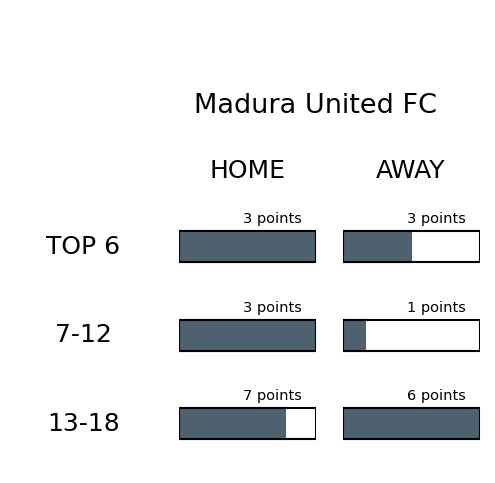

In [134]:
fig = p.figure(figsize = (4,4), dpi=150, facecolor='white')

p.tight_layout(pad=.3)

ax_dict = fig.subplot_mosaic(
    layout
)
for apa in ['logo', 'club', 'text', 'pos', 'hbar', 'abar']:#
    ax_dict[apa].axis('off')

ax_dict['club'].annotate(xy = (.05,.0), text = dct['club'][0], ha = 'left', va = 'top', size = 13)

#ax_dict['club'].plot([0,1],[0,0])

ax_dict["text"].annotate(xy = (.5,.2), text = "HOME", ha = "center", va = "center", size = 12)
ax_dict["text"].annotate(xy = (.85,.2), text = "AWAY", ha = "center", va = "center", size = 12)

ax_dict["pos"].set_ylim([0, 30])
ax_dict["pos"].annotate(xy = (.5,25), text = "TOP 6", ha = "center", va = "center", size = 12)
ax_dict["pos"].annotate(xy = (.5,15), text = "7-12", ha = "center", va = "center", size = 12)
ax_dict["pos"].annotate(xy = (.5,5), text = "13-18", ha = "center", va = "center", size = 12)

ax_dict["hbar"].set_ylim([0, 30])
ax_dict["hbar"].set_xlim([0, 1])

ax_dict["abar"].set_ylim([0, 30])
ax_dict["abar"].set_xlim([0, 1])

for i, j in zip ([25, 15, 5], [0, 1, 2]):
    ax_dict["hbar"].barh(y = i, width = 1, height = 3.5, color = 'none', edgecolor = 'k')
    ax_dict["hbar"].fill_between(x = [0, (dct['home'][0]['point'][j]/dct['home'][0]['width'][j])-.005], y1 = i+1.75, y2 = i-1.75, color = '#4e616e')
    ax_dict['hbar'].annotate(xy = (.9, (i + 2.3)), text = str(dct['home'][0]['point'][j])+' points', ha = 'right', va = 'bottom', size = 7)

    ax_dict["abar"].barh(y = i, width = 1, height = 3.5, color = 'none', edgecolor = 'k')
    ax_dict["abar"].fill_between(x = [0,(dct['away'][0]['point'][j]/dct['away'][0]['width'][j])-.005], y1 = i+1.75, y2 = i-1.75, color = '#4e616e')  
    ax_dict['abar'].annotate(xy = (.9, (i + 2.3)), text = str(dct['away'][0]['point'][j])+' points', ha = 'right', va = 'bottom', size = 7)

### subplots plots

In [18]:
from matplotlib import gridspec
from matplotlib import patches

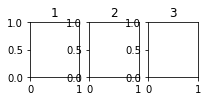

In [155]:
# Create the main figure
fig = p.figure(figsize=(3, 1))

# Create a 2x2 grid of subplots within the main figure
gs = fig.add_gridspec(1, 3)

# Define the subplots using subplot_mosaic
subplots = {
    '1': gs[0, 0],
    '2': gs[0, 1],
    '3': gs[0, 2]
}

# Now you can plot in each subplot using the SubplotSpec
for key, subplot in subplots.items():
    ax = fig.add_subplot(subplot)
    ax.set_title(key)

# Adjust spacing between subplots
#plt.tight_layout()

Text(0.5, 0.98, '\nHow Did BRI Liga 1 Teams Earn Their Points?')

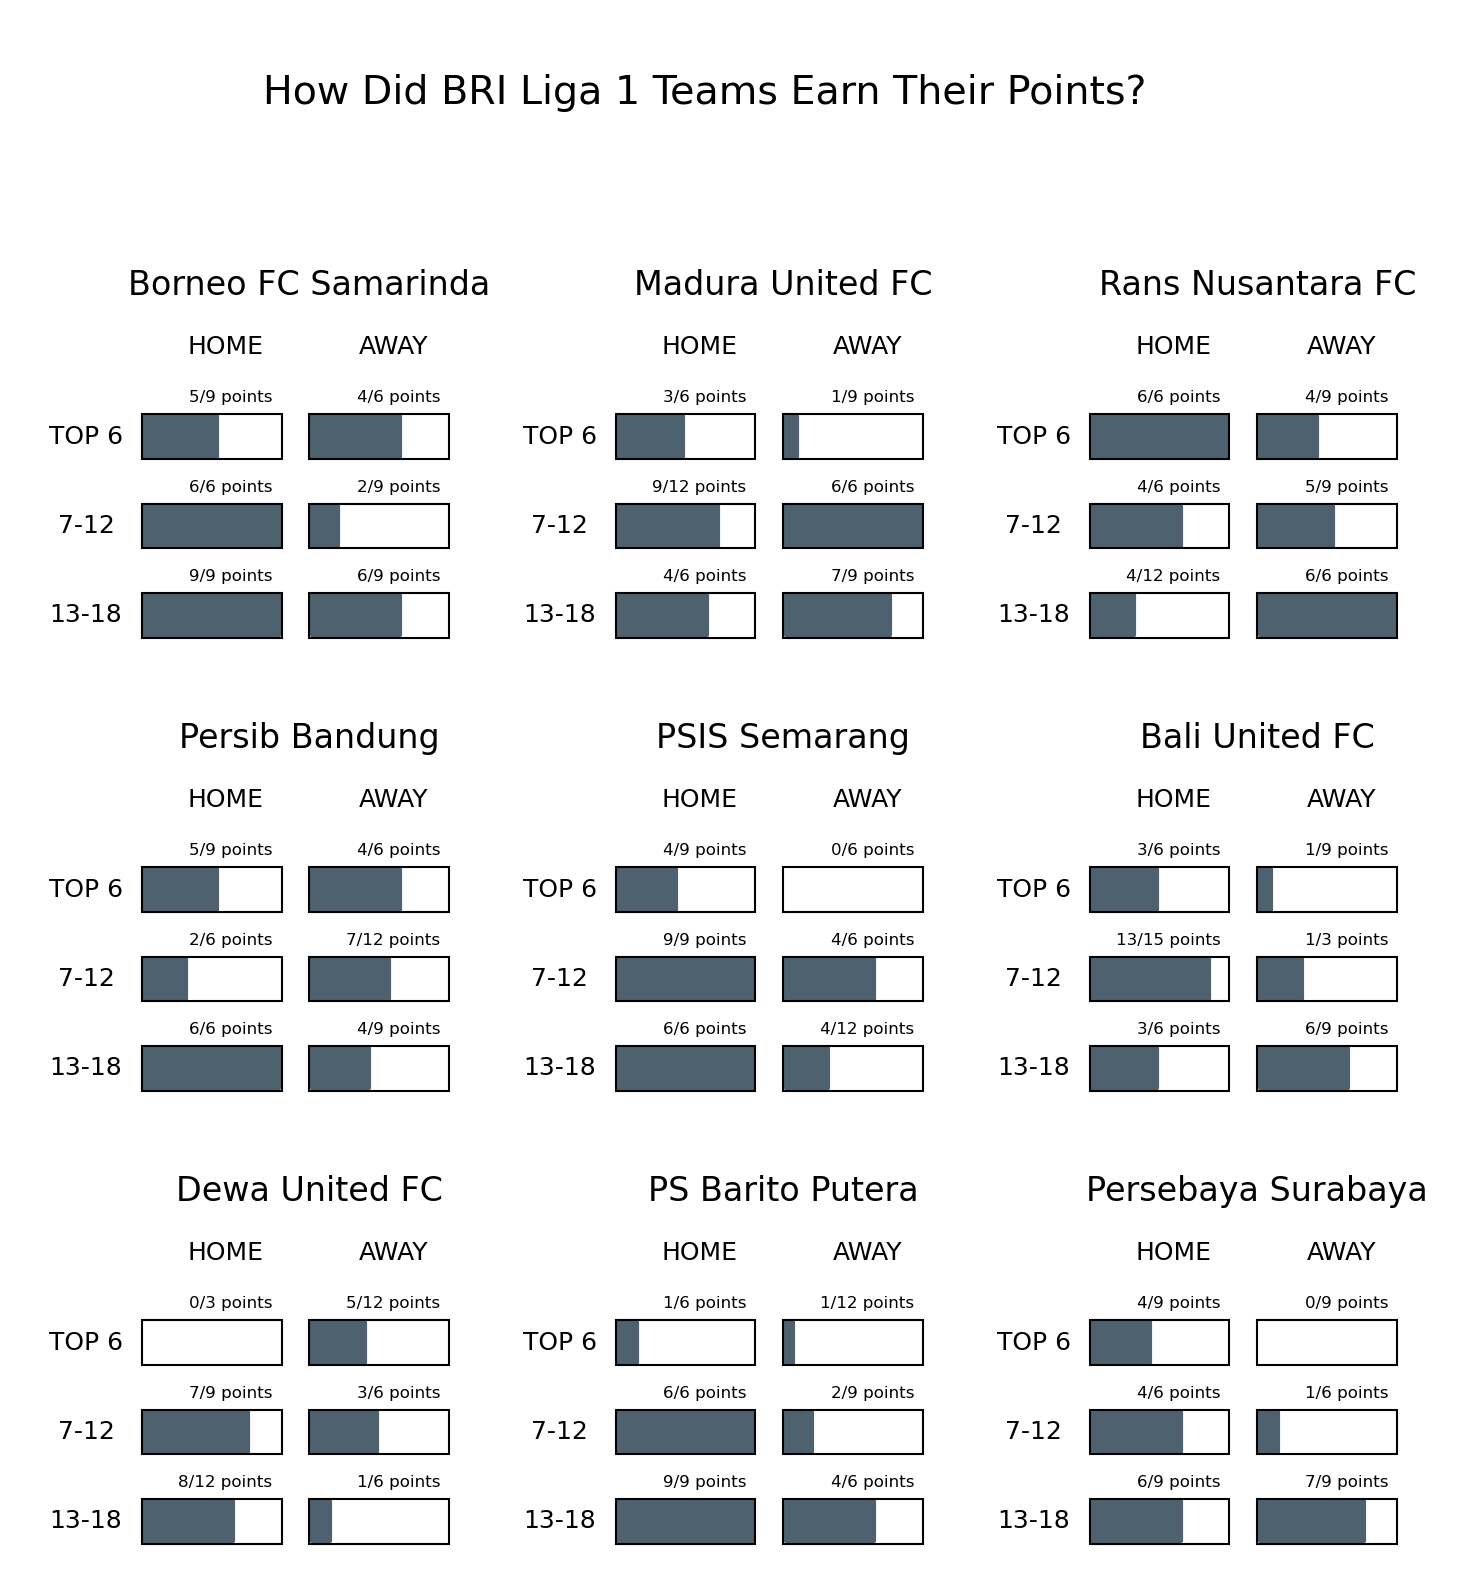

In [103]:
fig, ax = p.subplots(3,3,figsize = (6,6), dpi=300)

p.setp(ax, xlim=(0, 1), ylim=(0, 1))
#fig.tight_layout()
p.subplots_adjust(wspace=.06, hspace=0)

for axn, cl in zip (ax.flat, range(len(dct['club'][:9]))): #9,18
    
    axn.annotate(xy = (5/8,4/5), text = dct['club'][cl], ha = 'center', va = 'bottom', size = 8)
    axn.annotate(xy = (7/16,.7), text = "HOME", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (13/16,.7), text = "AWAY", ha = "center", va = "center", size = 6)

    axn.annotate(xy = (1/8,.5), text = "TOP 6", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (1/8,.3), text = "7-12", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (1/8,.1), text = "13-18", ha = "center", va = "center", size = 6)
    
    for i, j in zip ([.45,.25,.05], [0,1,2]):
        
        #axn.fill_between(x = [1/4, 1/4+(5/16)*dct['fhome'][cl]['point'][j]/(dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])], y1 = i, y2 = i+.1, color = 'b', alpha=.4)
        #axn.fill_between(x = [1/4+(5/16)*dct['fhome'][cl]['point'][j]/(dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j]), 1/4+(5/16)*dct['home'][cl]['point'][j]/(dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])], y1 = i, y2 = i+.1, color = '#4e616e')
        #axn.fill_between(x = [5/8, 5/8+(5/16)*dct['away'][cl]['point'][j]/dct['away'][cl]['width'][j]], y1 = i, y2 = i+.1, color = '#4e616e')
        
        for ix, venue in zip ([1/4,5/8],['home', 'away']):
            axn.add_patch(patches.Rectangle((ix, i), 5/16, .1, facecolor="none", ec='k', lw=.5))
            if dct[venue][cl]['point'][j] != 0:
                axn.fill_between(x = [ix+.005, ix+(5/16)*dct[venue][cl]['point'][j]/dct[venue][cl]['width'][j]-.005], y1 = i+.005, y2 = i+.1-.005, color = '#4e616e')
            axn.annotate(xy = ((ix+5/16-.02), (i+.12)), text = str(dct[venue][cl]['point'][j])+'/'+str(dct[venue][cl]['width'][j])+' points', ha = 'right', va = 'bottom', size = 4)

    axn.set(adjustable='box', aspect='equal')
    axn.axis('off')
    
fig.suptitle("\nHow Did BRI Liga 1 Teams Earn Their Points?", size=9.5)

Text(0.5, 0.98, '\nHow Did BRI Liga 1 Teams Earn Their Points?')

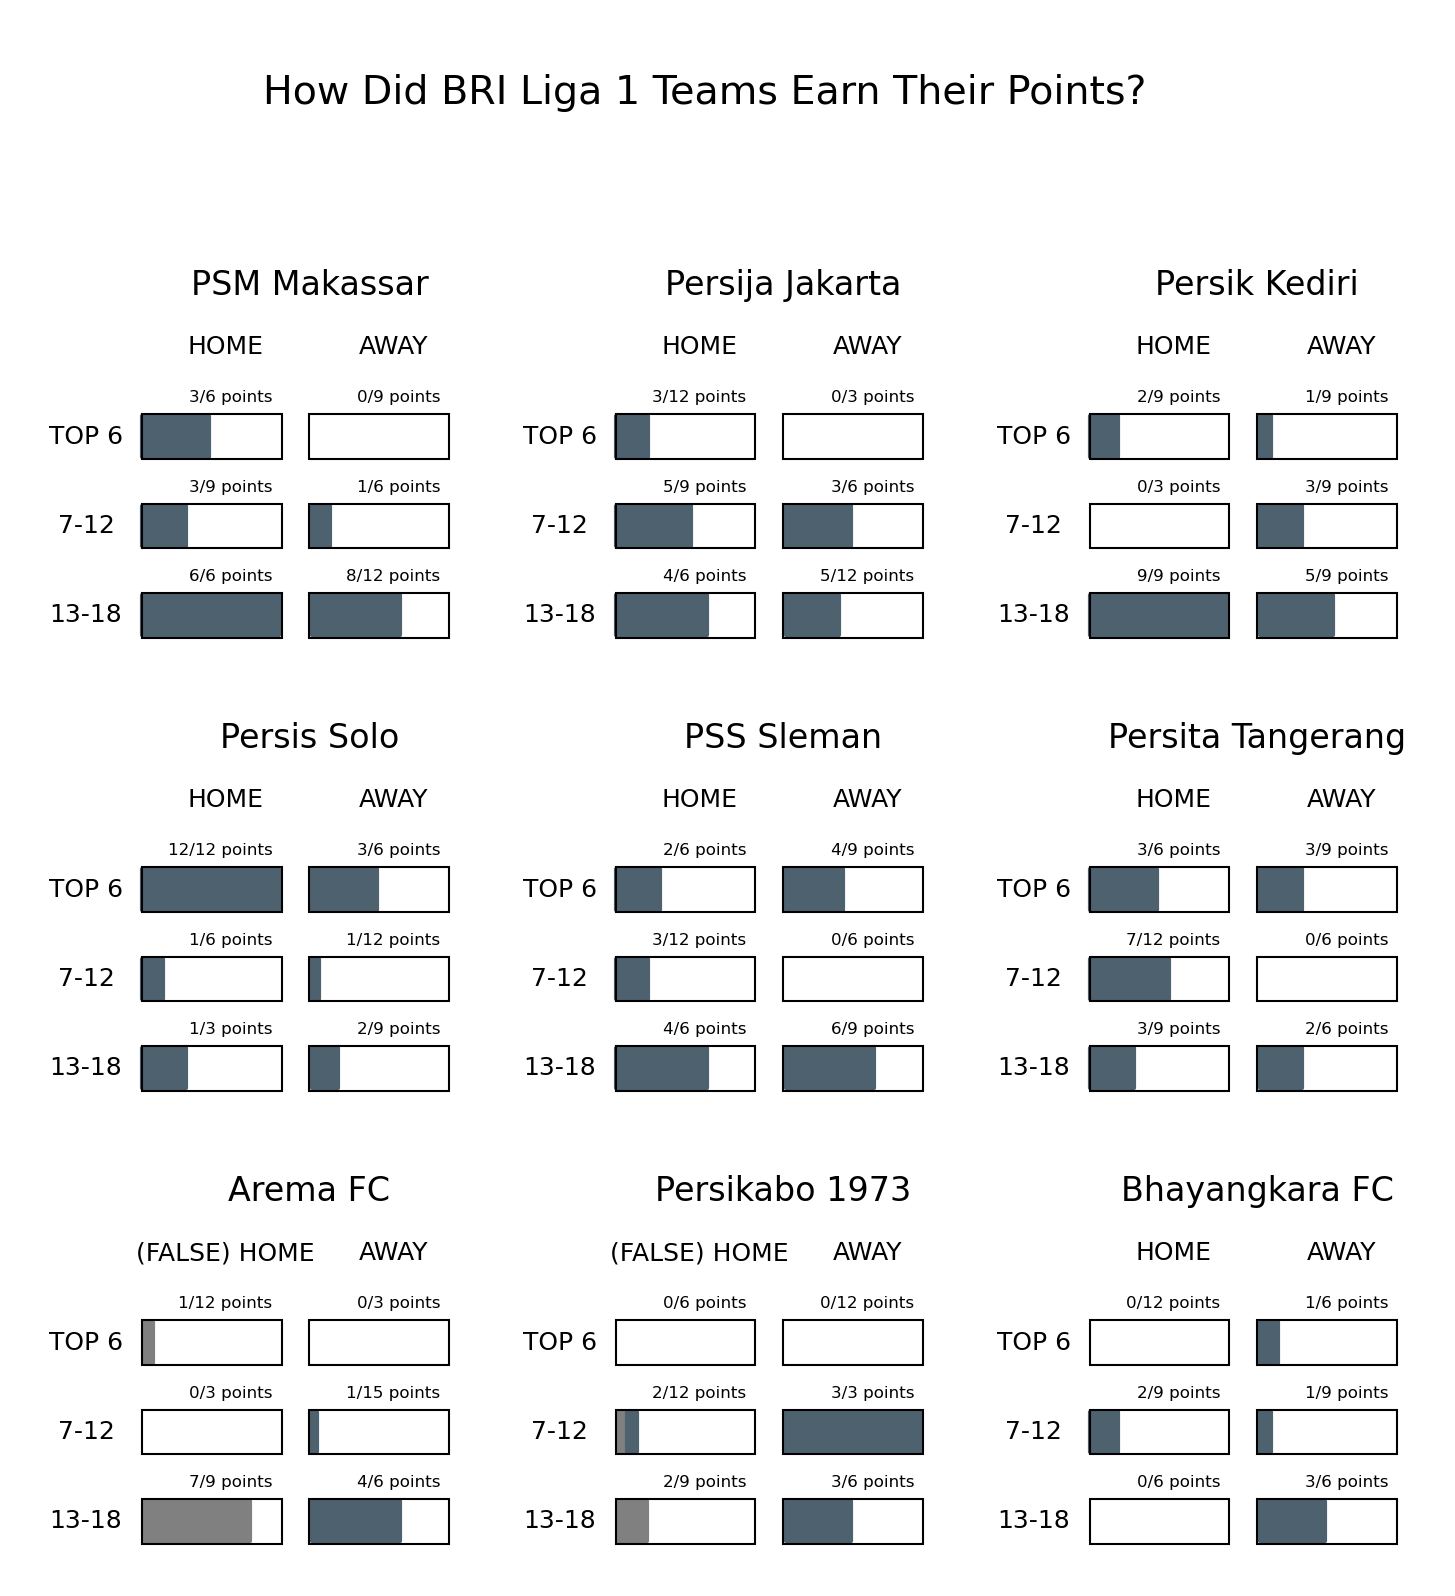

In [104]:
fig, ax = p.subplots(3,3,figsize = (6,6), dpi=300)

p.setp(ax, xlim=(0, 1), ylim=(0, 1))
#fig.tight_layout()
p.subplots_adjust(wspace=.06, hspace=0)

for axn, cl in zip (ax.flat, range(9,18)): #len(dct['club'][:9])
    
    axn.annotate(xy = (5/8,4/5), text = dct['club'][cl], ha = 'center', va = 'bottom', size = 8)
    
    if (sum(dct['fhome'][cl]['point']) == 0) | (dct['club'][cl]=='Persis Solo'):
        axn.annotate(xy = (7/16,.7), text = "HOME", ha = "center", va = "center", size = 6)
    else:
        axn.annotate(xy = (7/16,.7), text = "(FALSE) HOME", ha = "center", va = "center", size = 6)
        
    axn.annotate(xy = (13/16,.7), text = "AWAY", ha = "center", va = "center", size = 6)

    axn.annotate(xy = (1/8,.5), text = "TOP 6", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (1/8,.3), text = "7-12", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (1/8,.1), text = "13-18", ha = "center", va = "center", size = 6)
    
    for i, j in zip ([.45,.25,.05], [0,1,2]):
        
        #if dct['home'][cl]['width'][j] != 0:
        homebar=dct['home'][cl]['point'][j]/(dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])
        fhomebar=dct['fhome'][cl]['point'][j]/(dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])
        awaybar=dct['away'][cl]['point'][j]/dct['away'][cl]['width'][j]
        
        if (fhomebar != 0) & ((dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])!=0):
            if dct['club'][cl]!='Persis Solo':
                axn.fill_between(x = [1/4+.005, 1/4+(5/16)*fhomebar], y1 = i+.005, y2 = i+.1-.005, color = 'gray')#, alpha=.4
            else:
                axn.fill_between(x = [1/4+.005, 1/4+(5/16)*fhomebar], y1 = i+.005, y2 = i+.1-.005, color = '#4e616e')
        if (homebar != 0) & ((dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])!=0):
            axn.fill_between(x = [1/4+(5/16)*fhomebar, 1/4+(5/16)*(fhomebar+homebar)-.005], y1 = i+.005, y2 = i+.1-.005, color = '#4e616e')
        if (awaybar != 0) & (dct['away'][cl]['width'][j]!=0):
            axn.fill_between(x = [5/8+.005, 5/8+(5/16)*awaybar-.005], y1 = i+.005, y2 = i+.1-.005, color = '#4e616e')
        
        axn.annotate(xy = ((1/4+5/16-.02), (i+.12)), text = str(dct['home'][cl]['point'][j]+dct['fhome'][cl]['point'][j])+'/'+str(dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])+' points', ha = 'right', va = 'bottom', size = 4)
        axn.annotate(xy = ((5/8+5/16-.02), (i+.12)), text = str(dct['away'][cl]['point'][j])+'/'+str(dct['away'][cl]['width'][j])+' points', ha = 'right', va = 'bottom', size = 4)
        
        for ix, venue in zip ([1/4,5/8],['home', 'away']):
            axn.add_patch(patches.Rectangle((ix, i), 5/16, .1, facecolor="none", ec='k', lw=.5))
            #axn.fill_between(x = [ix, ix+(5/16)*dct[venue][cl]['point'][j]/dct[venue][cl]['width'][j]], y1 = i, y2 = i+.1, color = '#4e616e')
            #axn.annotate(xy = ((ix+5/16-.02), (i+.12)), text = str(dct[venue][cl]['point'][j])+' points', ha = 'right', va = 'bottom', size = 4)

    axn.set(adjustable='box', aspect='equal')
    axn.axis('off')
    
fig.suptitle("\nHow Did BRI Liga 1 Teams Earn Their Points?", size=9.5)

In [35]:
dct['fhome'][0]['width']

[0, 0, 0]

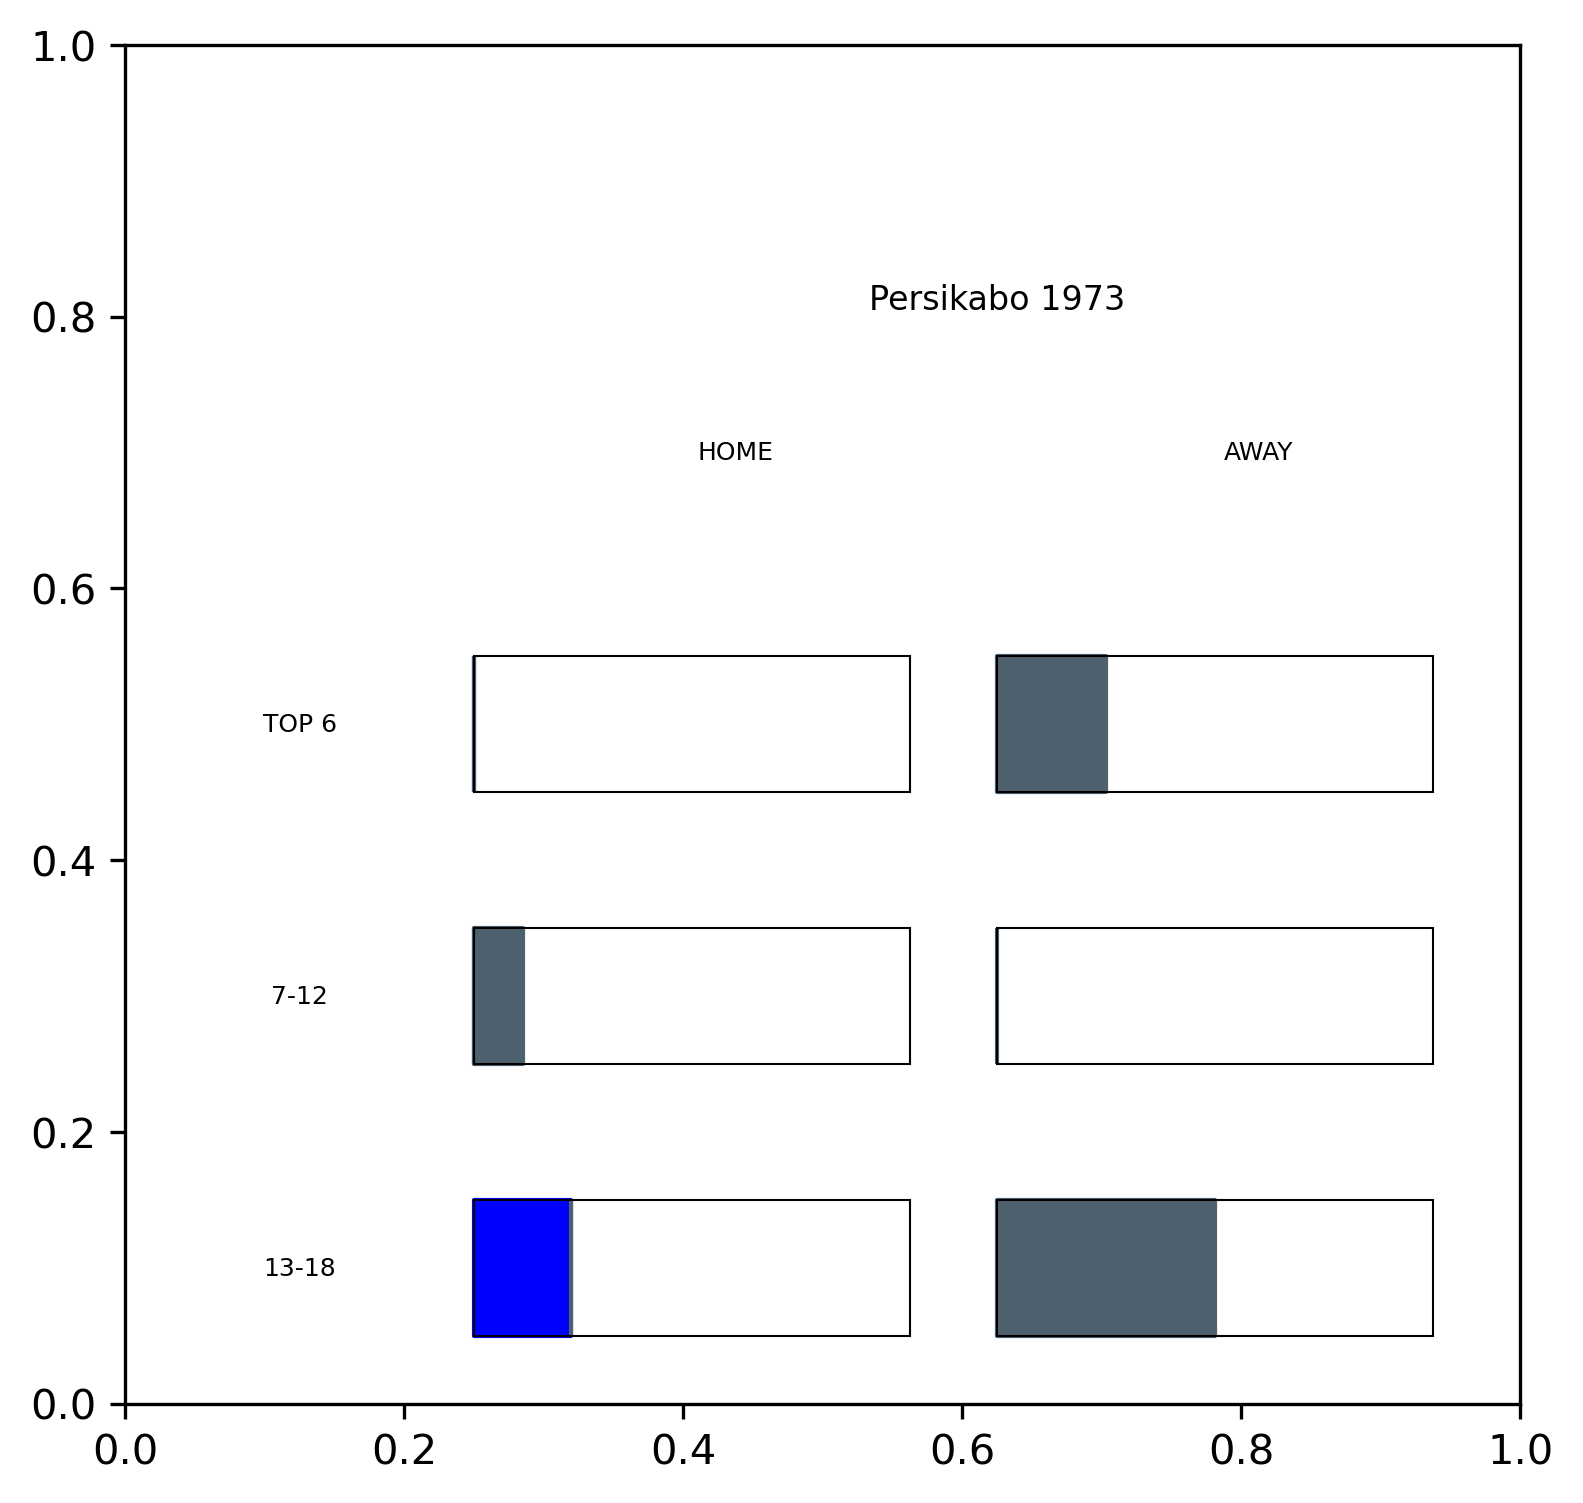

In [31]:
fig, ax = p.subplots(1,1,figsize = (6,6), dpi=300)

p.setp(ax, xlim=(0, 1), ylim=(0, 1))
#fig.tight_layout()
    
ax.annotate(xy = (5/8,4/5), text = dct['club'][16], ha = 'center', va = 'bottom', size = 8)
ax.annotate(xy = (7/16,.7), text = "HOME", ha = "center", va = "center", size = 6)
ax.annotate(xy = (13/16,.7), text = "AWAY", ha = "center", va = "center", size = 6)
ax.annotate(xy = (1/8,.5), text = "TOP 6", ha = "center", va = "center", size = 6)
ax.annotate(xy = (1/8,.3), text = "7-12", ha = "center", va = "center", size = 6)
ax.annotate(xy = (1/8,.1), text = "13-18", ha = "center", va = "center", size = 6)

for i, j in zip ([.45,.25,.05], [0,1,2]):
    #if dct['fhome'][15]['width'][j]==0:
    #    pass
    #elif:
    homebar=dct['home'][16]['point'][j]/(dct['home'][16]['width'][j]+dct['fhome'][16]['width'][j])
    fhomebar=dct['fhome'][16]['point'][j]/(dct['home'][16]['width'][j]+dct['fhome'][16]['width'][j])
    awaybar=dct['away'][16]['point'][j]/dct['away'][16]['width'][j]
    
    ax.fill_between(x = [1/4, 1/4+(5/16)*fhomebar], y1 = i, y2 = i+.1, color = 'b')
    ax.fill_between(x = [1/4+(5/16)*fhomebar, 1/4+(5/16)*(fhomebar+homebar)], y1 = i, y2 = i+.1, color = '#4e616e')
    ax.fill_between(x = [5/8, 5/8+(5/16)*awaybar], y1 = i, y2 = i+.1, color = '#4e616e')
    
    ax.add_patch(patches.Rectangle((1/4, i), 5/16, .1, facecolor="none", ec='k', lw=.5))
    ax.add_patch(patches.Rectangle((5/8, i), 5/16, .1, facecolor="none", ec='k', lw=.5))
    
# AREMA FHOME  {'point': [0, 1, 3], 'width': [6, 6, 3]}, AWAY {'point': [0, 1, 4], 'width': [3, 6, 9]},

# points earned/lost at

In [86]:
hbdf = pd.read_csv('homebase.csv', comment='#', escapechar='\t')
hbdf.rename(columns=lambda x: x.strip('\t ') if isinstance(x, str) else x, inplace=True)

for col in hbdf.columns:
    hbdf[col] = hbdf[col].apply(lambda x: x.strip('\t')if isinstance(x, str) else x)
    hbdf[col] = hbdf[col].apply(lambda x: x.lstrip() if isinstance(x, str) else x)
hbdf

,club,homebase,city,homelib,citylib,played,falsehome,dom
0,Arema FC,Kanjuruhan,Malang,Kanjuruhan,Malang,no,Kapten I Wayan Dipta,Gianyar
1,Bali United FC,Kapten I Wayan Dipta,Gianyar,Kapten I Wayan Dipta,Gianyar,yes,NaN,NaN
2,Bhayangkara FC,Patriot Chandra Bhaga,Bekasi,Wibawa Mukti,Bekasi,yes,NaN,NaN
3,Borneo FC Samarinda,Segiri,Samarinda,Segiri,Samarinda,yes,NaN,NaN
4,Dewa United FC,Indomilk Arena,Tangerang,Indomilk Arena,Tangerang,yes,NaN,NaN
5,Madura United FC,Gelora Bangkalan,Bangkalan,Gelora Madura Ratu Pamelingan,Pamekasan,yes,NaN,NaN
6,PS Barito Putera,17 Mei,Banjarmasin,Demang Lehman,Martapura,yes,NaN,NaN
7,PSIS Semarang,Citarum,Semarang,Jatidiri,Semarang,yes,NaN,NaN
8,PSM Makassar,Andi Mattalatta Mattoanging,Makassar,Gelora B. J. Habibie,Pare-pare,yes,NaN,NaN
9,PSS Sleman,Maguwoharjo,Sleman,Maguwoharjo,Sleman,yes,NaN,NaN


In [87]:
homepoints  = []
awaypoints  = []
fhomepoints = []
totalpoints = []
thpoints    = []

for cl, std, std2, dom in zip (hbdf['club'], hbdf['homebase'], hbdf['homelib'], hbdf['dom']):
    
    if 'Persis' in cl:
        hpe  = df.loc[( (df['home']==cl) & ( (df['stadium']==std)|(df['city']==dom) ) )]['hpoint'].sum()
        fhpe = df.loc[( (df['home']==cl) & ( (df['stadium']!=std)&(df['city']!=dom) ) )]['hpoint'].sum()
        
    else:
        hpe  = df.loc[( (df['home']==cl) & ( (df['stadium']==std)|(df['stadium']==std2) ) )]['hpoint'].sum()
        fhpe = df.loc[( (df['home']==cl) & ( (df['stadium']!=std)&(df['stadium']!=std2) ) )]['hpoint'].sum()
            
    ape  = df.loc[(df['away']==cl)]['apoint'].sum()
    
    homepoints.append(hpe)
    fhomepoints.append(fhpe)
    awaypoints.append(ape)
    
    thpoints.append(hpe+fhpe)
    
    totalpoints.append(hpe+fhpe+ape)

In [88]:
def itung (syrt):
    earned = syrt.sum()
    fulll = syrt.count()*3
    lost = fulll-earned
    return (lost)

In [89]:
homelost  = []
awaylost  = []
fhomelost = []
totallost = []
thlost    = []
for cl, std, std2, dom in zip (hbdf['club'], hbdf['homebase'], hbdf['homelib'], hbdf['dom']):
    
    if 'Persis' in cl:
        hplost = itung(df.loc[( (df['home']==cl) & ( (df['stadium']==std)|(df['city']==dom) ) )]['hpoint'])
        fhplost = itung(df.loc[( (df['home']==cl) & ( (df['stadium']!=std)&(df['city']!=dom) ) )]['hpoint'])
        
    else:
        hplost  = itung(df.loc[( (df['home']==cl) & ( (df['stadium']==std)|(df['stadium']==std2) ) )]['hpoint'])
        fhplost = itung(df.loc[( (df['home']==cl) & ( (df['stadium']!=std)&(df['stadium']!=std2) ) )]['hpoint'])
            
    aplost = itung(df.loc[(df['away']==cl)]['apoint'])
    
    homelost.append(hplost)
    fhomelost.append(fhplost)
    awaylost.append(aplost)
    
    thlost.append(hplost+fhplost)
    
    totallost.append(hplost+fhplost+aplost)

In [90]:
yep = pd.DataFrame({
    'Club': hbdf['club'],
    'Home Points': homepoints,
    'False Home Points': fhomepoints,
    'Away Points': awaypoints,
    'Total Points': totalpoints,
    'th': thpoints,
    'Home Lost': homelost,
    'False Home Lost': fhomelost,
    'Away Lost': awaylost,
    'Total Lost': totallost,
    'th Lost': thlost
})
yep

,Club,Home Points,False Home Points,Away Points,Total Points,th,Home Lost,False Home Lost,Away Lost,Total Lost,th Lost
0,Arema FC,0,8,5,13,8,0,16,19,35,16
1,Bali United FC,19,0,8,27,19,8,0,13,21,8
2,Bhayangkara FC,2,0,5,7,2,25,0,16,41,25
3,Borneo FC Samarinda,20,0,12,32,20,4,0,12,16,4
4,Dewa United FC,15,0,9,24,15,9,0,15,24,9
5,Madura United FC,16,0,14,30,16,8,0,10,18,8
6,PS Barito Putera,16,0,7,23,16,5,0,20,25,5
7,PSIS Semarang,19,0,8,27,19,5,0,16,21,5
8,PSM Makassar,12,0,9,21,12,9,0,18,27,9
9,PSS Sleman,9,0,10,19,9,15,0,14,29,15


In [91]:
# Merge "sh," "tables," and "yep" dataframes on the "Clubs" column and sort based on "sh" order
merg = sh[['Clubs']].merge(tables, left_on="Clubs", right_on="Clubs")
merg = merg.merge(yep, left_on="Clubs", right_on="Club")#.sort_values(by="pr", ascending=False)
merg.drop(columns=["Club"], inplace=True)
merg.index=merg.index+1
# Print the sorted merged dataframe
merg

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,Home Points,False Home Points,Away Points,Total Points,th,Home Lost,False Home Lost,Away Lost,Total Lost,th Lost
1,Borneo FC Samarinda,16,9,5,2,23,14,9,32,20,0,12,32,20,4,0,12,16,4
2,Madura United FC,16,9,3,4,29,20,9,30,16,0,14,30,16,8,0,10,18,8
3,Rans Nusantara FC,16,8,5,3,21,15,6,29,14,0,15,29,14,10,0,9,19,10
4,Persib Bandung,16,7,7,2,30,21,9,28,13,0,15,28,13,8,0,12,20,8
5,PSIS Semarang,16,8,3,5,24,18,6,27,19,0,8,27,19,5,0,16,21,5
6,Bali United FC,16,8,3,5,26,21,5,27,19,0,8,27,19,8,0,13,21,8
7,Dewa United FC,16,6,6,4,24,19,5,24,15,0,9,24,15,9,0,15,24,9
8,PS Barito Putera,16,6,5,5,23,16,7,23,16,0,7,23,16,5,0,20,25,5
9,Persebaya Surabaya,16,6,4,6,20,23,-3,22,14,0,8,22,14,10,0,16,26,10
10,PSM Makassar,16,6,3,7,19,17,2,21,12,0,9,21,12,9,0,18,27,9


most home win

In [92]:
merg.loc[merg['Home Points']==max(merg['Home Points']+merg['False Home Points'])]

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,Home Points,False Home Points,Away Points,Total Points,th,Home Lost,False Home Lost,Away Lost,Total Lost,th Lost
1,Borneo FC Samarinda,16,9,5,2,23,14,9,32,20,0,12,32,20,4,0,12,16,4


most away win

In [93]:
merg.loc[merg['Home Points']==max(merg['Away Points'])]

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,Home Points,False Home Points,Away Points,Total Points,th,Home Lost,False Home Lost,Away Lost,Total Lost,th Lost
7,Dewa United FC,16,6,6,4,24,19,5,24,15,0,9,24,15,9,0,15,24,9


In [94]:
# for visualization purposes
merg.loc[:,:'Away Points']

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,Home Points,False Home Points,Away Points
1,Borneo FC Samarinda,16,9,5,2,23,14,9,32,20,0,12
2,Madura United FC,16,9,3,4,29,20,9,30,16,0,14
3,Rans Nusantara FC,16,8,5,3,21,15,6,29,14,0,15
4,Persib Bandung,16,7,7,2,30,21,9,28,13,0,15
5,PSIS Semarang,16,8,3,5,24,18,6,27,19,0,8
6,Bali United FC,16,8,3,5,26,21,5,27,19,0,8
7,Dewa United FC,16,6,6,4,24,19,5,24,15,0,9
8,PS Barito Putera,16,6,5,5,23,16,7,23,16,0,7
9,Persebaya Surabaya,16,6,4,6,20,23,-3,22,14,0,8
10,PSM Makassar,16,6,3,7,19,17,2,21,12,0,9


#### PT LIB tables

In [47]:
# pt lib error
# merg.iloc[8] and [9]
# Suppose we want to swap rows at index i and j
i = 8
j = 9

# Step 1: Identify the positions of the rows to swap
# Step 2: Use .iloc[] to access and store the rows in temporary variables
temp_row_i = merg.iloc[i].copy()
temp_row_j = merg.iloc[j].copy()

# Step 3: Swap the rows by assigning them back to their original positions
merg.iloc[i] = temp_row_j
merg.iloc[j] = temp_row_i

In [48]:
merg[['Clubs','Home Points', 'False Home Points', 'Away Points', 'Total Points', 'th']]

,Clubs,Home Points,False Home Points,Away Points,Total Points,th
0,Madura United FC,9,0,4,13,9
1,Persija Jakarta,4,3,4,11,7
2,Dewa United FC,7,0,4,11,7
3,PS Barito Putera,0,6,4,10,6
4,Bali United FC,6,0,4,10,6
5,Persita Tangerang,6,0,4,10,6
6,Borneo FC Samarinda,7,0,2,9,7
7,Rans Nusantara FC,4,0,5,9,4
8,Persikabo 1973,1,1,6,8,2
9,PSM Makassar,0,3,5,8,3


## plot(s)

### earned

In [12]:
import matplotlib.pyplot as p

Text(0, 19.2, 'source: Liga Indonesia Baru')

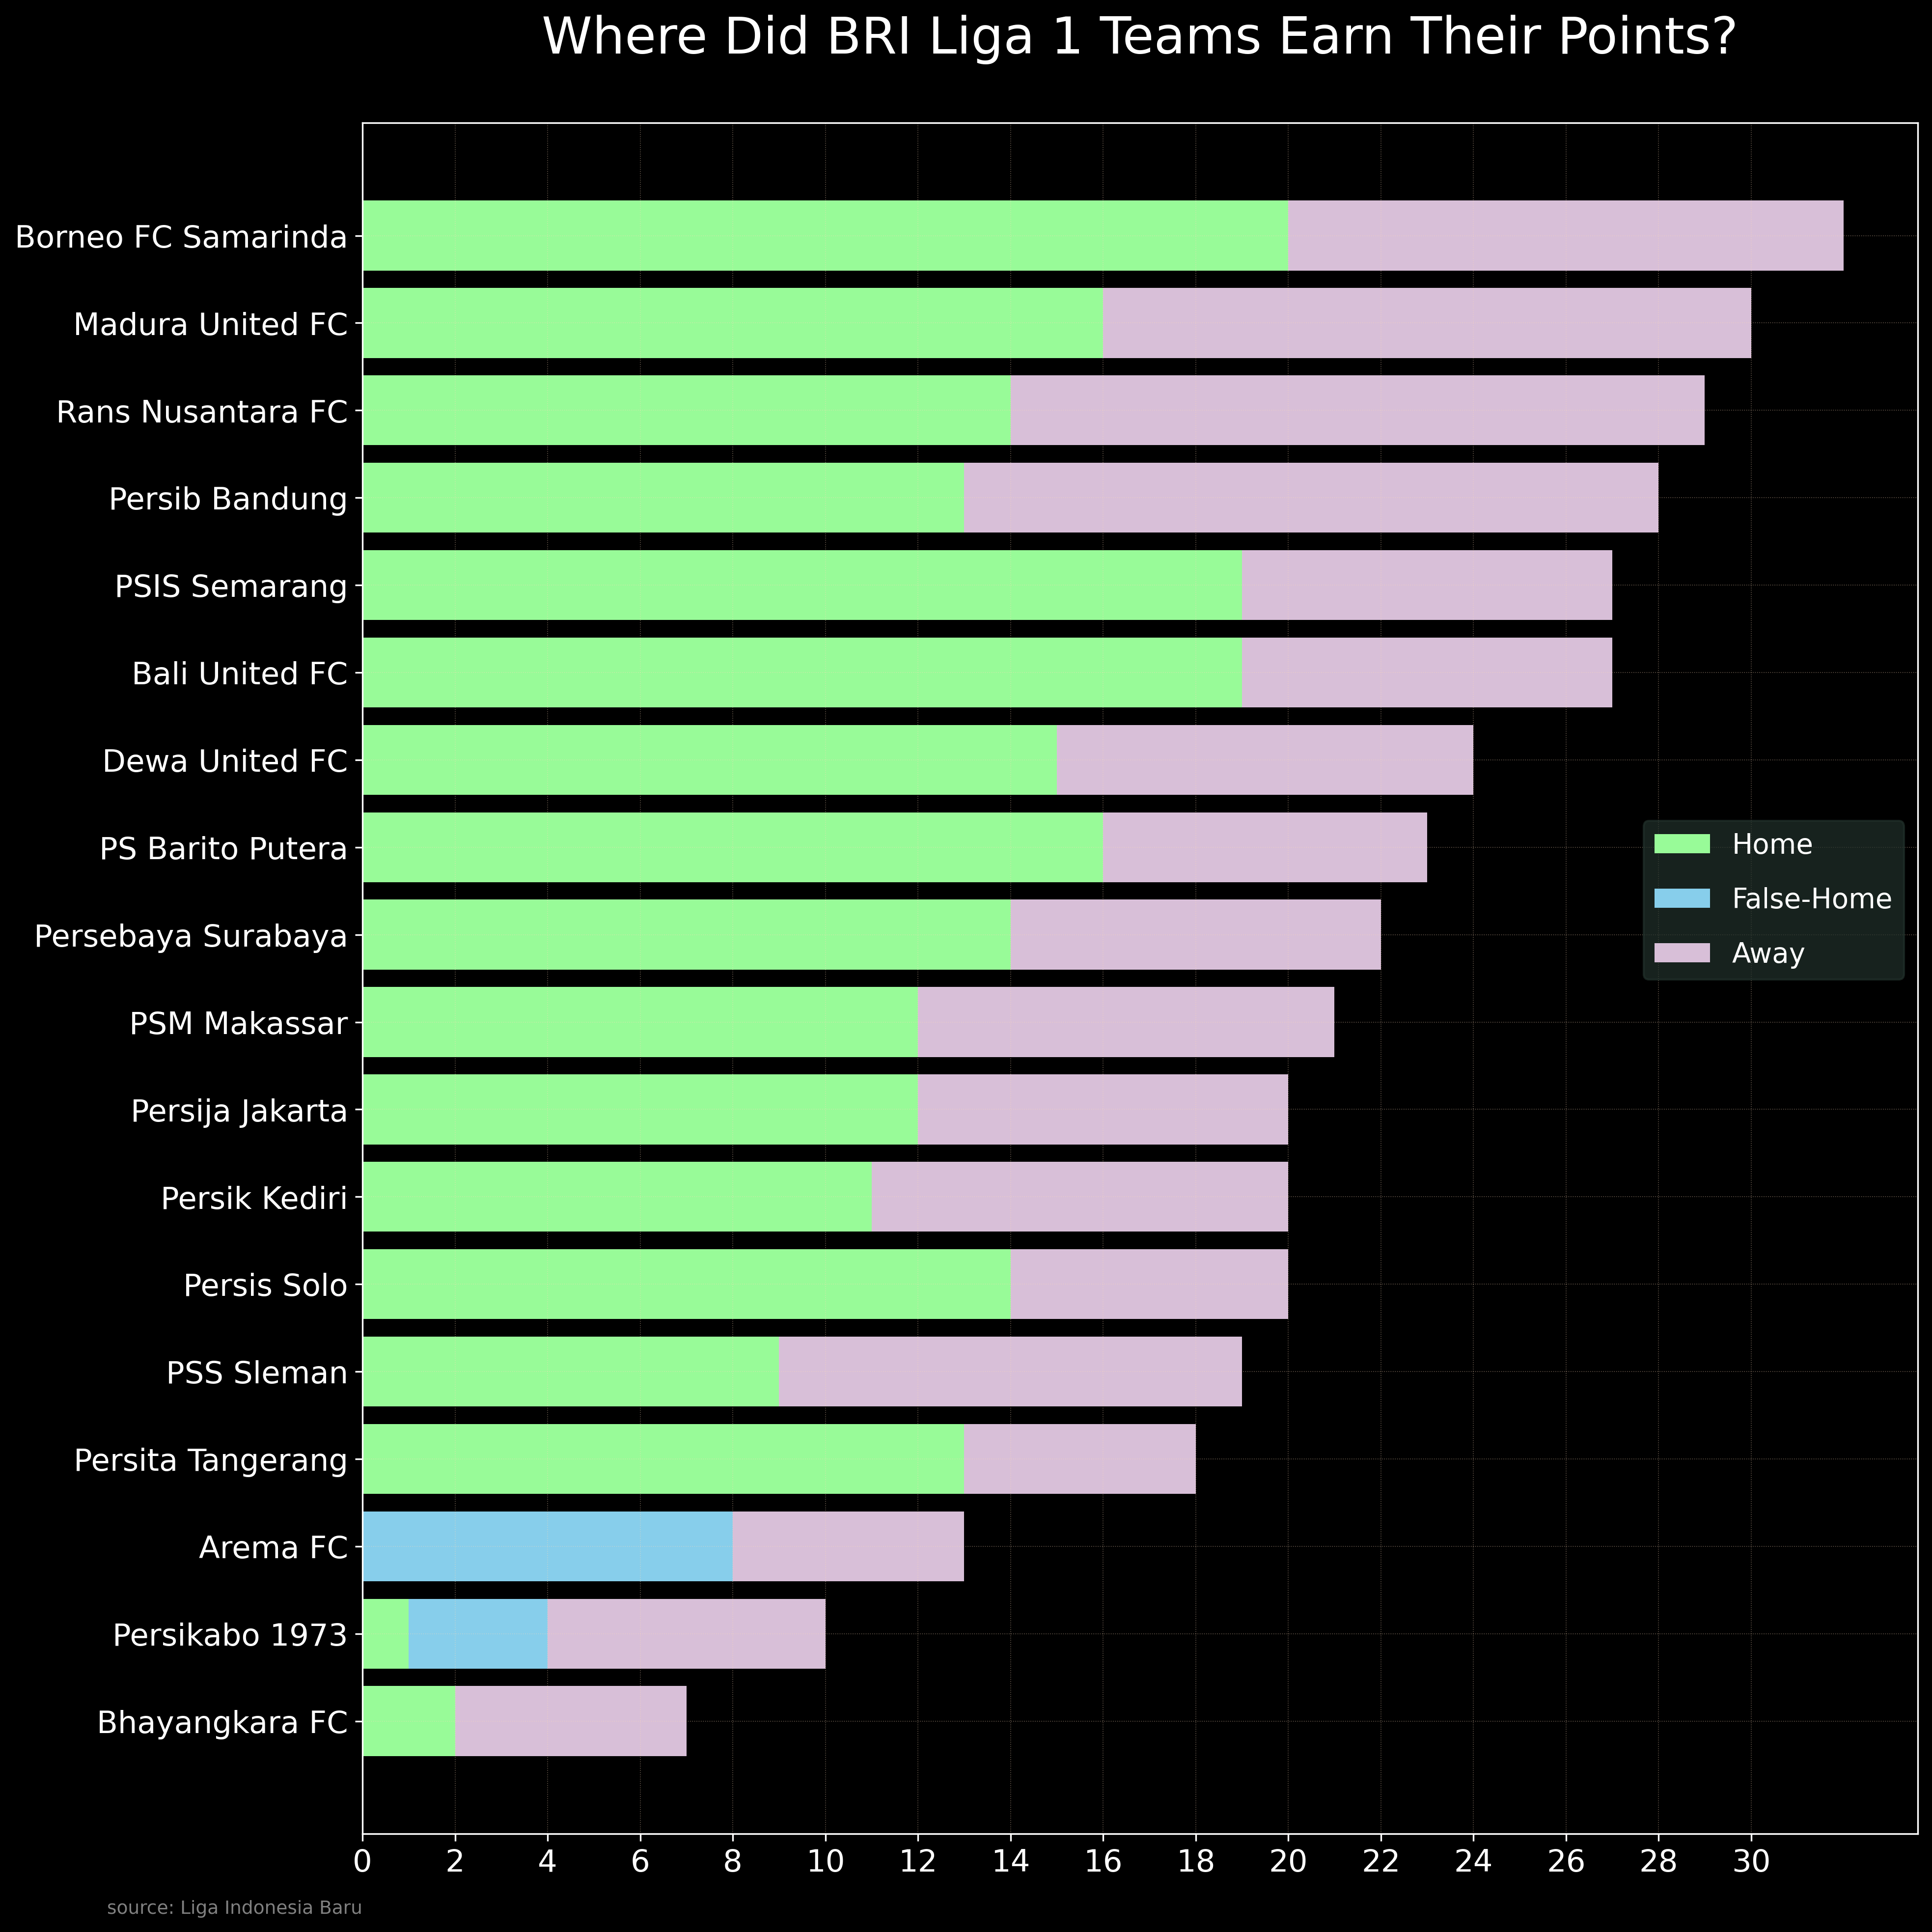

In [95]:
f1=p.figure(num=1, figsize=(13,13), dpi=300, facecolor='k', constrained_layout=True)#22312b
p.axes(facecolor='k')
p.grid(linewidth=.4, linestyle=':', alpha=.4, color='peachpuff')
p.barh(merg.Clubs, merg['Home Points'], color='palegreen', label='Home')
p.barh(merg.Clubs, merg['False Home Points'], left=merg['Home Points'], color='skyblue', label='False-Home')
p.barh(merg.Clubs, merg['Away Points'], left=merg['Home Points']+merg['False Home Points'], color='thistle', label='Away')
p.tick_params(colors='white')
p.legend(bbox_to_anchor=(0.5, 0.1, 0.5, 0.5), #loc='lower right', 
         facecolor='#22312b', edgecolor='#22312b', #(.8,.6)
         fontsize=13.5, labelcolor='white', labelspacing=1,
         fancybox=True, framealpha=.7)
p.yticks(size=15)
p.xticks(n.arange(0,max(merg['Points']),2),
         size=15)
#p.xlim(0,max(merg['Points'])+1)
for spine in ['top', 'bottom', 'left', 'right']:
    p.gca().spines[spine].set_color('white')
p.gca().invert_yaxis()
p.title("Where Did BRI Liga 1 Teams Earn Their Points?\n", size=25, color='white')#Dari Mana Klub BRI Liga 1 Memperoleh Poin?
p.text(s="source: Liga Indonesia Baru", x=0, y=19.2, ha='right', fontsize=9, color='grey')
#p.gca().get_yticklabels()

### lost

Text(0, 19.2, 'source: Liga Indonesia Baru')

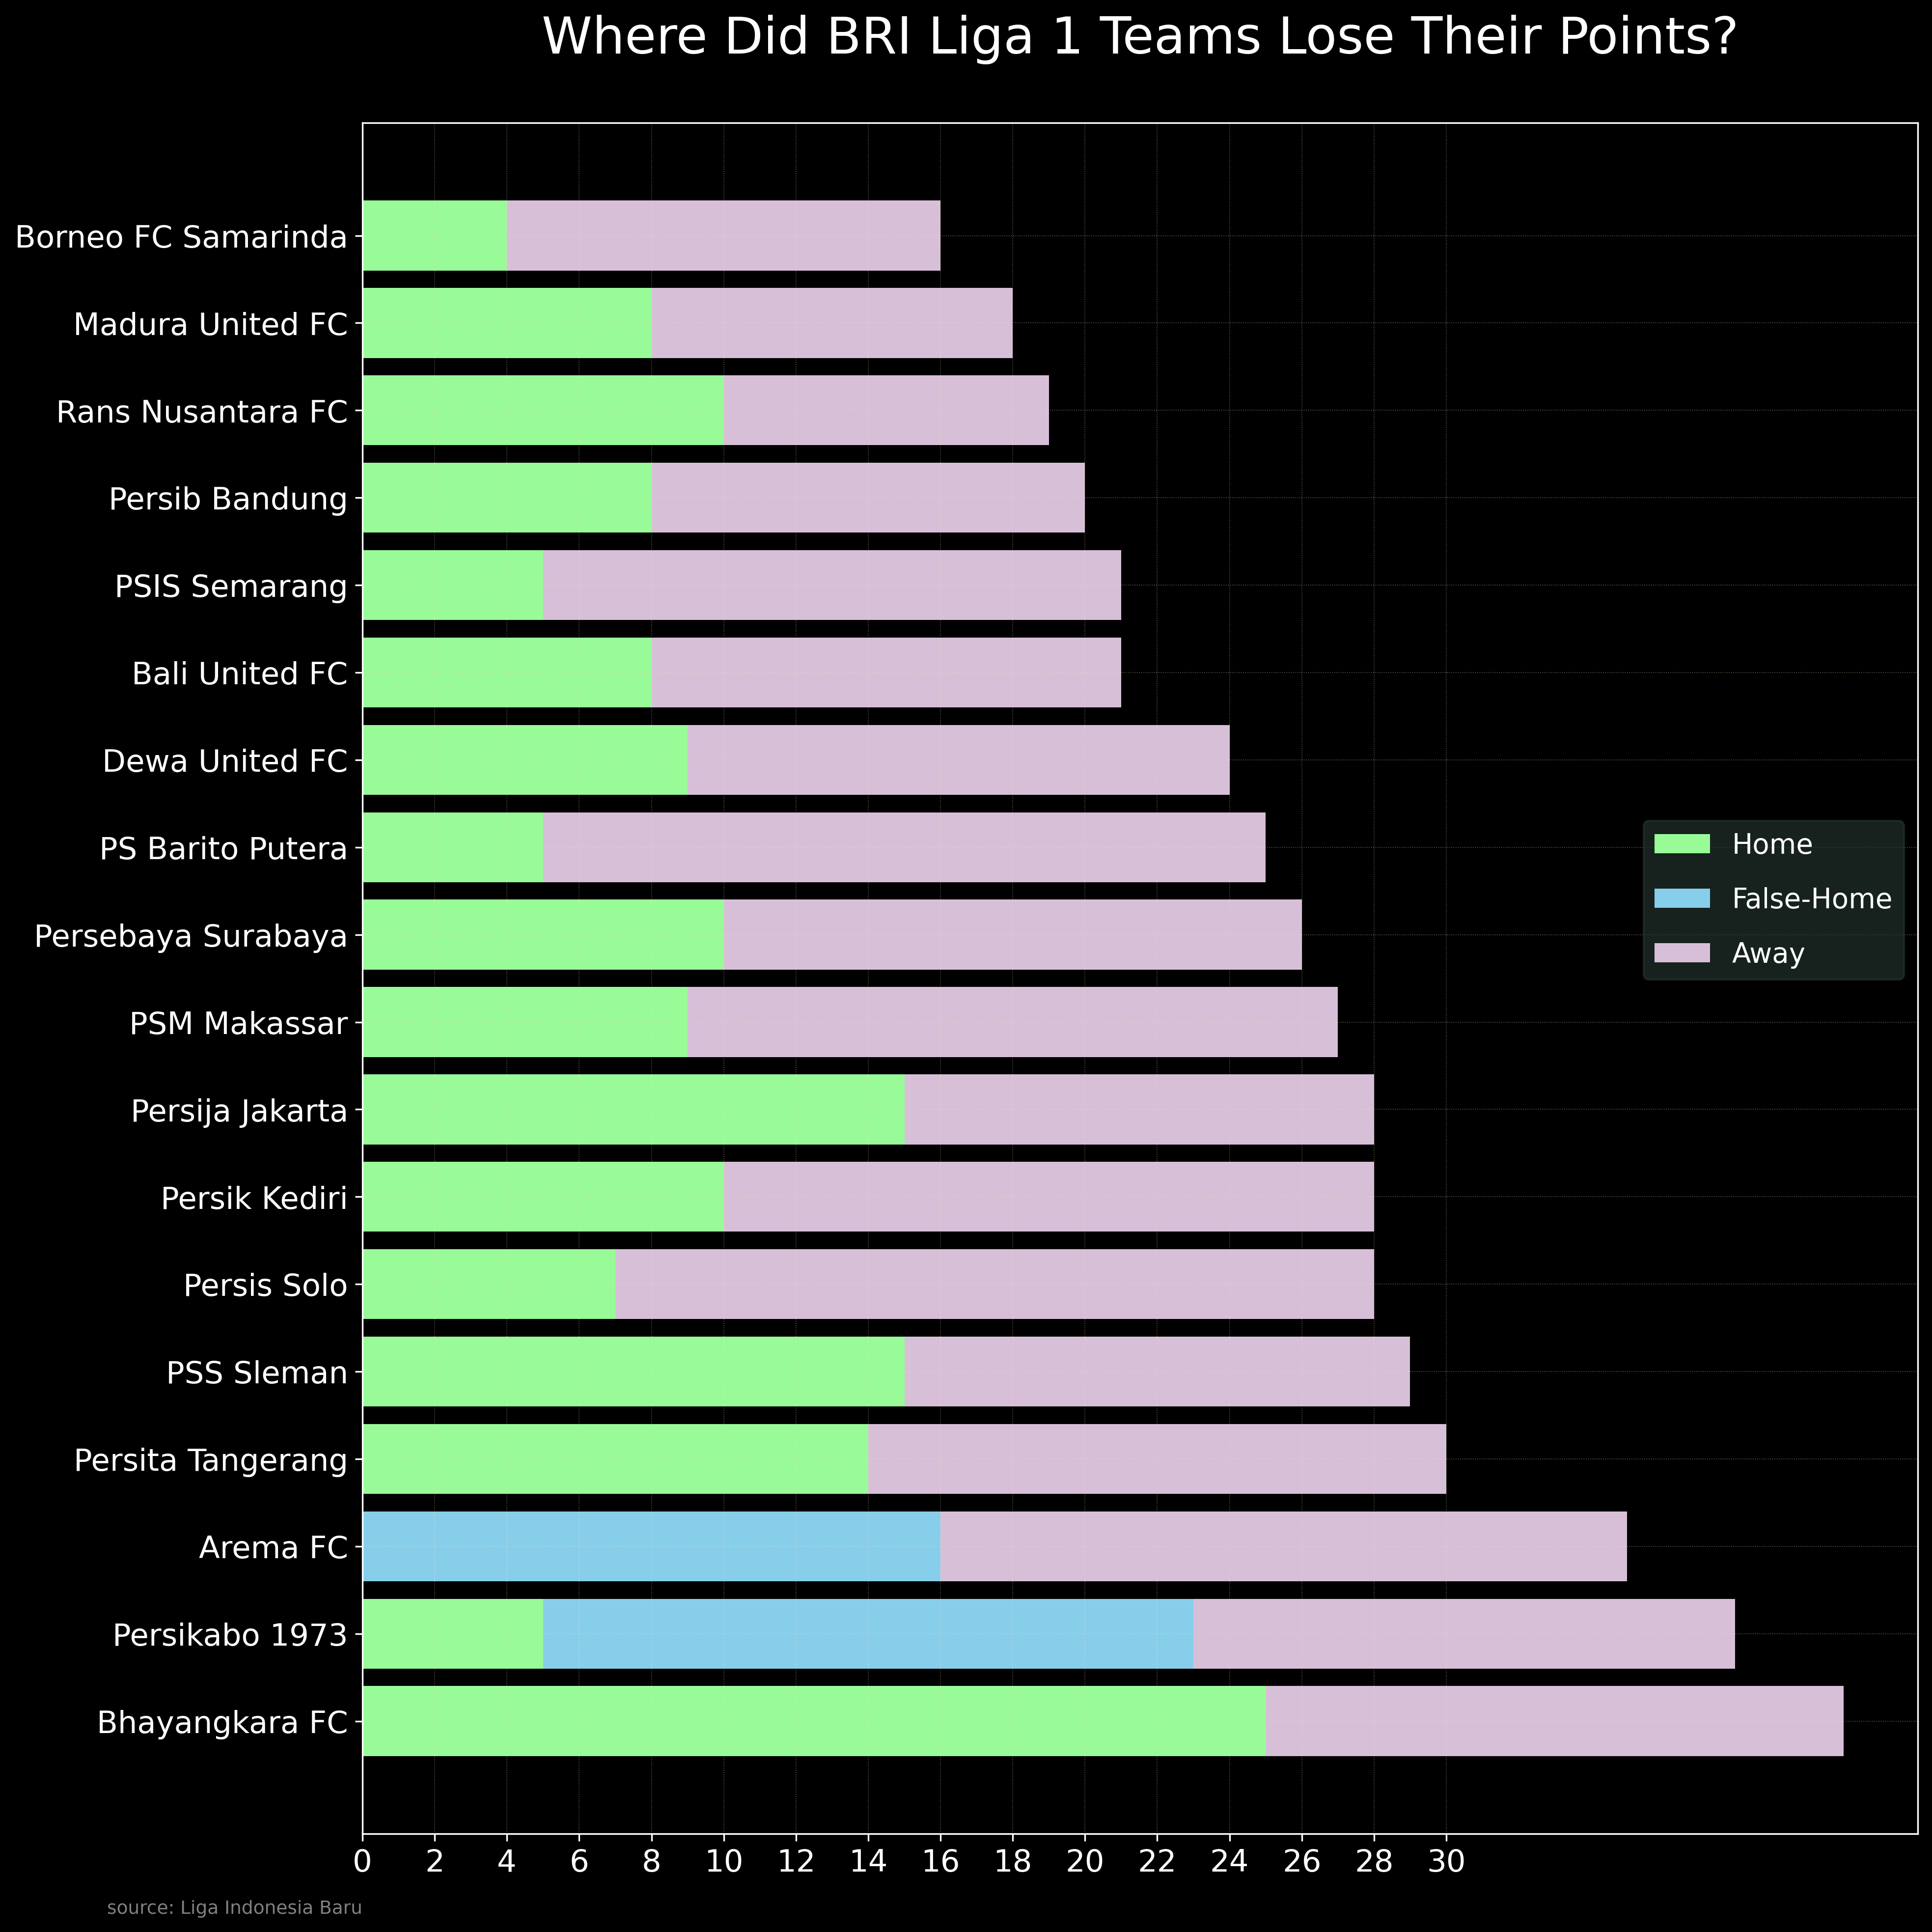

In [96]:
f2=p.figure(num=2, figsize=(13,13), dpi=300, facecolor='k', constrained_layout=True)#22312b
p.axes(facecolor='k')
p.grid(linewidth=.4, ls=':', alpha=.4, color='peachpuff')
p.barh(merg.Clubs, merg['Home Lost'], color='palegreen', label='Home')
p.barh(merg.Clubs, merg['False Home Lost'], left=merg['Home Lost'], color='skyblue', label='False-Home')
p.barh(merg.Clubs, merg['Away Lost'], left=merg['Home Lost']+merg['False Home Lost'], color='thistle', label='Away')
p.tick_params(colors='white')
p.legend(bbox_to_anchor=(0.5, 0.1, 0.5, 0.5), #loc=(1,.5), #(.8,.6)
         facecolor='#22312b', edgecolor='#22312b',
         fontsize=13.5, labelcolor='white', labelspacing=1,
         fancybox=True, framealpha=.7)
p.yticks(size=15)
p.xticks(n.arange(0,max(merg['Points']),2), size=15)
for spine in ['top', 'bottom', 'left', 'right']:
    p.gca().spines[spine].set_color('white')
p.gca().invert_yaxis()
p.title("Where Did BRI Liga 1 Teams Lose Their Points?\n", size=25, color='white')#Di Mana Klub BRI Liga 1 Kehilangan Poin?
p.text(s="source: Liga Indonesia Baru", x=0, y=19.2, ha='right', fontsize=9, color='grey')
#p.gca().get_yticklabels()

In [25]:
###y